In [138]:
import pandas as pd
df1=pd.read_csv("C:/Users/yaazhisai/Desktop/singapore resale/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")

In [139]:
df2=pd.read_csv("C:/Users/yaazhisai/Desktop/singapore resale/ResaleFlatPricesBasedonApprovalDate19901999.csv")

In [140]:
df3=pd.read_csv("C:/Users/yaazhisai/Desktop/singapore resale/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

In [141]:
df4=pd.read_csv("C:/Users/yaazhisai/Desktop/singapore resale/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [142]:
df5=pd.read_csv("C:/Users/yaazhisai/Desktop/singapore resale/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

In [143]:
df1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [144]:
df2.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [145]:
df3.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [146]:
df4.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [147]:
df5.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [148]:
df_new1=pd.concat([df2,df1,df5,df3,df4],axis=0,ignore_index=True)

In [149]:
df_new1.drop(columns='remaining_lease',inplace=True)

In [150]:
df_new1.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [151]:
df_new1.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0


In [152]:
df_new1.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

In [153]:
df_new1['month']=df_new1['month'].astype('datetime64[ns]')

In [154]:
df_new1['lease_commence_date']=df_new1['lease_commence_date'].astype('int64')

In [155]:
df_new1.describe()

,month,floor_area_sqm,lease_commence_date,resale_price
count,929324,929324.000000,929324.000000,9.293240e+05
mean,2006-09-02 18:37:11.578222336,95.690294,1988.298276,3.214457e+05
min,1990-01-01 00:00:00,28.000000,1966.000000,5.000000e+03
25%,1999-01-01 00:00:00,73.000000,1981.000000,1.935000e+05
50%,2005-04-01 00:00:00,93.000000,1986.000000,2.980000e+05
75%,2014-04-01 00:00:00,113.000000,1996.000000,4.180000e+05
max,2024-07-01 00:00:00,307.000000,2020.000000,1.588000e+06
std,NaN,25.821944,10.685851,1.711021e+05


In [156]:
df_new1['saleyear']=df_new1['month'].dt.year

In [157]:
df_new1['salemonth']=df_new1['month'].dt.month

In [158]:
df_new1['salemonth']

0         1
1         1
2         1
3         1
4         1
         ..
929319    7
929320    7
929321    7
929322    7
929323    7
Name: salemonth, Length: 929324, dtype: int32

In [159]:
df_new1.drop_duplicates(inplace=True)

In [160]:
df_new1.shape

(927352, 12)

In [161]:
df_new1['rem_lease_year']=99-(df_new1['saleyear']-df_new1['lease_commence_date'])

In [162]:
df_new1['rem_lease_year'].value_counts()

rem_lease_year
94     51129
95     49858
93     38176
86     34257
89     34238
       ...  
99       100
42        65
100       47
101        4
41         2
Name: count, Length: 61, dtype: int64

In [163]:
df_new1= df_new1.query('rem_lease_year <= 99')

In [164]:
df_new1.shape

(927301, 13)

In [165]:
df_new1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,saleyear,salemonth,rem_lease_year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,86
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,86


In [166]:
df_new1['lease_commence_date'].value_counts()

lease_commence_date
1985    87413
1984    63462
1988    50726
1987    42875
1978    41294
1986    38599
1989    32267
1980    31994
1997    30998
1979    30933
1993    28212
1996    28100
1998    25699
1983    23110
1976    21508
1999    20941
1981    20905
1977    20717
1992    20257
2001    19549
1995    19019
2000    18436
1975    17365
2003    15784
1974    14534
1982    13317
2002    12610
1970    11437
2015    10219
1990     9282
1973     8577
2004     8473
1969     8342
1971     7858
1994     6555
2016     6367
1967     6191
1972     5808
2018     5685
2013     5528
2017     5370
2012     4995
2005     4046
2014     3764
2006     3196
2011     2691
2019     2292
2008     2150
1968     1867
2009     1797
2010     1370
1991     1247
2007      993
2020      544
1966       33
Name: count, dtype: int64

In [167]:
df_new1['street_name']

0         ANG MO KIO AVE 1
1         ANG MO KIO AVE 1
2         ANG MO KIO AVE 1
3         ANG MO KIO AVE 1
4         ANG MO KIO AVE 1
                ...       
929319        YISHUN ST 71
929320        YISHUN AVE 2
929321        YISHUN AVE 4
929322        YISHUN AVE 4
929323        YISHUN ST 22
Name: street_name, Length: 927301, dtype: object

In [168]:
df_new1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'saleyear', 'salemonth', 'rem_lease_year'],
      dtype='object')

In [169]:
df_new2=df_new1.copy()

In [170]:
df_new1_clean=df_new1.drop(columns=['month','block','street_name'],axis=0)

In [171]:
df_new1_clean

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,saleyear,salemonth,rem_lease_year
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,86
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,86
2,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1,86
3,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1,86
4,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1,85
...,...,...,...,...,...,...,...,...,...,...
929319,YISHUN,4 ROOM,07 TO 09,84.0,Simplified,1987,500000.0,2024,7,62
929320,YISHUN,5 ROOM,07 TO 09,132.0,Improved,1986,698000.0,2024,7,61
929321,YISHUN,5 ROOM,04 TO 06,113.0,Improved,2018,690000.0,2024,7,93
929322,YISHUN,5 ROOM,01 TO 03,112.0,Improved,2018,650000.0,2024,7,93


In [172]:
df_new1_clean['flat_type'][0][0]

'1'

In [173]:
df_new1_clean.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'saleyear', 'salemonth',
       'rem_lease_year'],
      dtype='object')

In [174]:
df_new1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [175]:
df_new1_clean.dtypes

town                    object
flat_type               object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
saleyear                 int32
salemonth                int32
rem_lease_year           int64
dtype: object

In [176]:
df_new1_clean.head(2)

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,saleyear,salemonth,rem_lease_year
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,86
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,86


In [177]:
df_new1_clean['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [178]:
df_new1_clean.replace(to_replace=["IMPROVED-MAISONETTE",'Improved-Maisonette','Improved'],
           value="IMPROVED",inplace=True)

In [179]:
df_new1_clean.replace(to_replace=['New Generation'],value=['NEW GENERATION'],inplace=True)

In [180]:
df_new1_clean.replace(to_replace=['Model A'],value=['MODEL A'],inplace=True)

In [181]:
df_new1_clean.replace(to_replace=['Standard'],value=['STANDARD'],inplace=True)

In [182]:
df_new1_clean.replace(to_replace=['Simplified'],value=['SIMPLIFIED'],inplace=True)

In [183]:
df_new1_clean.replace(to_replace=['Apartment'],value=['APARTMENT'],inplace=True)

In [184]:
df_new1_clean.replace(to_replace=['2-room'],value=['2-ROOM'],inplace=True)

In [185]:
df_new1_clean.replace(to_replace=['Multi Generation'],value=['MULTI GENERATION'],inplace=True)

In [186]:
df_new1_clean.replace(to_replace=['Premium Apartment'],value=['PREMIUM APARTMENT'],inplace=True)

In [187]:
df_new1_clean.replace(to_replace=['Maisonette'],value=['MAISONETTE'],inplace=True)

In [188]:
df_new1_clean.replace(to_replace=['Model A-Maisonette'],value=['MODEL A-MAISONETTE'],inplace=True)

In [189]:
df_new1_clean.replace(to_replace=['Terrace'],value=['TERRACE'],inplace=True)

In [190]:
df_new1_clean['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'MULTI GENERATION', 'PREMIUM APARTMENT', 'Adjoined flat',
       'Premium Maisonette', 'Model A2', 'DBSS', 'Type S1', 'Type S2',
       'Premium Apartment Loft', '3Gen'], dtype=object)

In [191]:
df_new1_clean['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [192]:
df_new1_clean['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [193]:
df_new1_clean['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1991, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2003, 2005, 2004, 2006, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [194]:
df_new1_clean['saleyear'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024])

In [195]:
df_new1_clean['salemonth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [196]:
df_new1_clean['rem_lease_year'].unique()

array([86, 85, 87, 88, 93, 89, 94, 90, 91, 95, 81, 92, 82, 78, 84, 80, 83,
       76, 79, 77, 97, 96, 98, 75, 99, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41], dtype=int64)

In [197]:
df_new1_clean['resale_price'].value_counts()


resale_price
300000.0    6909
350000.0    6843
280000.0    6524
320000.0    6515
400000.0    6287
            ... 
281837.0       1
284980.0       1
167238.0       1
302588.0       1
935100.0       1
Name: count, Length: 9545, dtype: int64

In [198]:
df1['storey_range'].value_counts().sort_index()

storey_range
01 TO 03    76806
04 TO 06    95136
07 TO 09    84673
10 TO 12    71215
13 TO 15    24521
16 TO 18     9018
19 TO 21     4209
22 TO 24     2521
25 TO 27     1032
28 TO 30      434
31 TO 33       31
34 TO 36       20
37 TO 39       23
40 TO 42       12
Name: count, dtype: int64

In [199]:
df5[['town','storey_range']].value_counts()

town          storey_range
WOODLANDS     04 TO 06        1039
TAMPINES      04 TO 06         991
JURONG WEST   04 TO 06         938
YISHUN        04 TO 06         923
WOODLANDS     07 TO 09         919
                              ... 
BUKIT TIMAH   22 TO 24           1
JURONG EAST   21 TO 25           1
CLEMENTI      40 TO 42           1
CENTRAL AREA  34 TO 36           1
CLEMENTI      16 TO 20           1
Name: count, Length: 355, dtype: int64

In [200]:
df_new1_clean.nunique()

town                     27
flat_type                 8
storey_range             25
floor_area_sqm          212
flat_model               20
lease_commence_date      55
resale_price           9545
saleyear                 35
salemonth                12
rem_lease_year           59
dtype: int64

In [201]:
df_new1_clean.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'saleyear', 'salemonth',
       'rem_lease_year'],
      dtype='object')

In [202]:
from sklearn.preprocessing import OrdinalEncoder
df_new1_clean['town']=OrdinalEncoder().fit_transform(df_new1_clean[['town']])
df_new1_clean['storey_range']=OrdinalEncoder().fit_transform(df_new1_clean[['storey_range']])
df_new1_clean['flat_model']=OrdinalEncoder().fit_transform(df_new1_clean[['flat_model']])



In [203]:
df_new1_clean['storey_range'].unique()

array([ 5.,  2.,  4.,  0.,  7., 10.,  8., 13., 12., 15., 16., 21., 20.,
       18.,  3.,  1.,  6.,  9., 11., 14., 19., 17., 23., 22., 24.])

In [204]:
df_new1_clean['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [205]:
df_new1_clean['flat_type']=df_new1_clean['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')

In [206]:
df_new1_clean['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [207]:
df_new1_clean['flat_type']=df_new1_clean['flat_type'].map({'1 ROOM':1,'2 ROOM':2, '3 ROOM':3,'4 ROOM':4,'5 ROOM':5,'EXECUTIVE':6,'MULTI GENERATION':7})

In [208]:
df_new1_clean['town'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 16., 19., 21., 22., 23., 24., 25., 26., 15., 20.,  5., 17.,
       18.])

In [209]:
df_new1_clean['flat_model'].unique()

array([ 5., 11.,  7., 16., 15.,  8.,  2.,  6., 17.,  0.,  9., 12.,  3.,
       14., 10.,  4., 18., 19., 13.,  1.])

In [210]:
df_new1_clean['storey_range'].unique()

array([ 5.,  2.,  4.,  0.,  7., 10.,  8., 13., 12., 15., 16., 21., 20.,
       18.,  3.,  1.,  6.,  9., 11., 14., 19., 17., 23., 22., 24.])

In [211]:
df_new1_clean['flat_type'].unique()

array([1, 3, 4, 5, 2, 6, 7], dtype=int64)

In [212]:
df_new1_clean['flat_type'].unique()

array([1, 3, 4, 5, 2, 6, 7], dtype=int64)

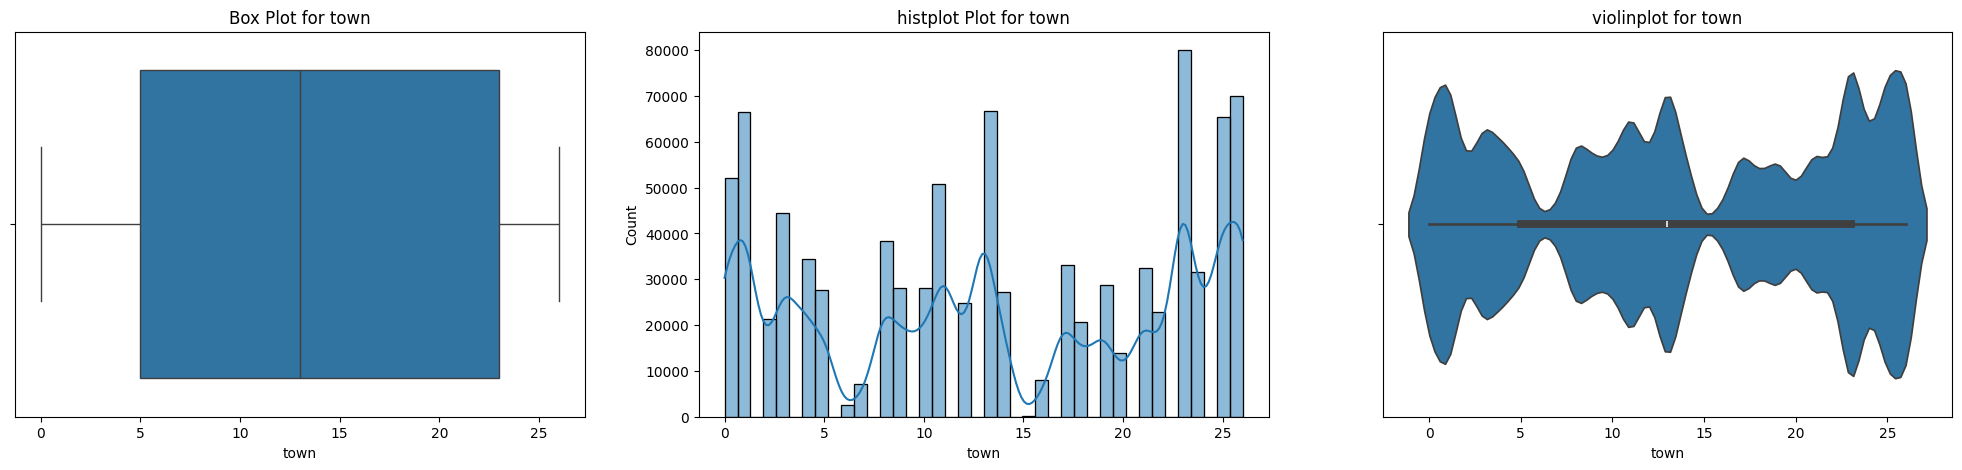

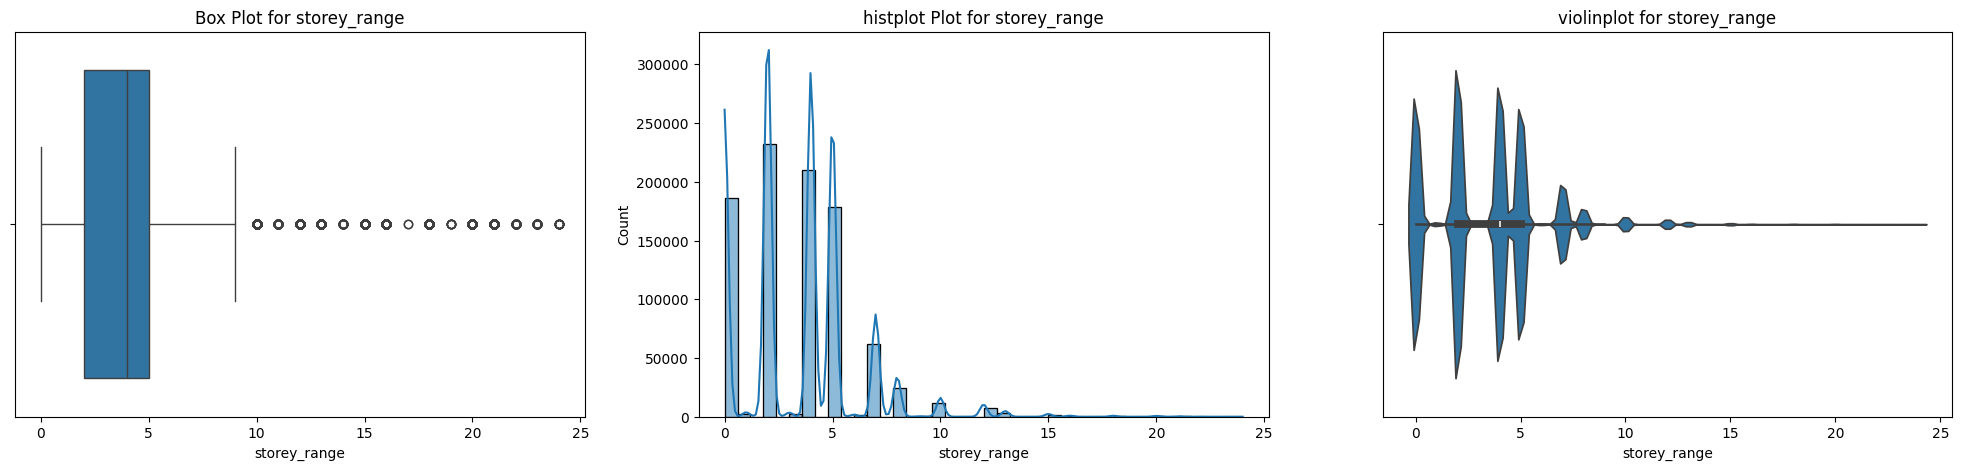

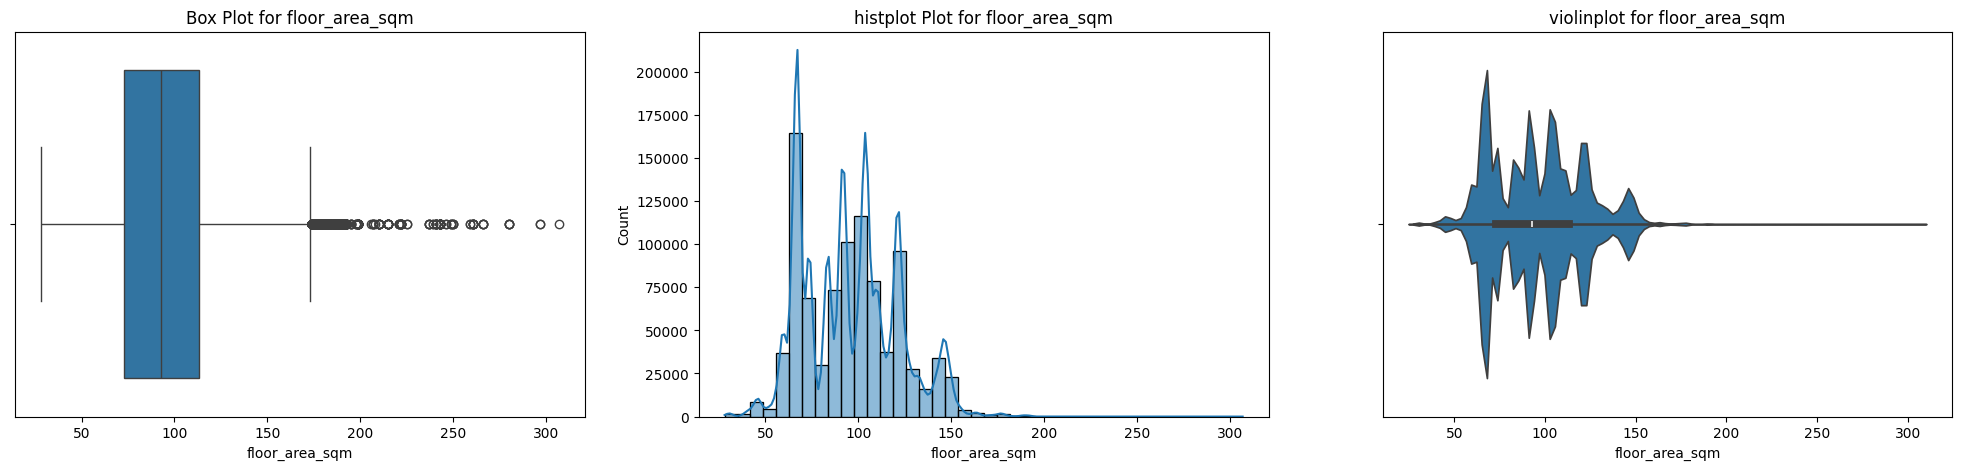

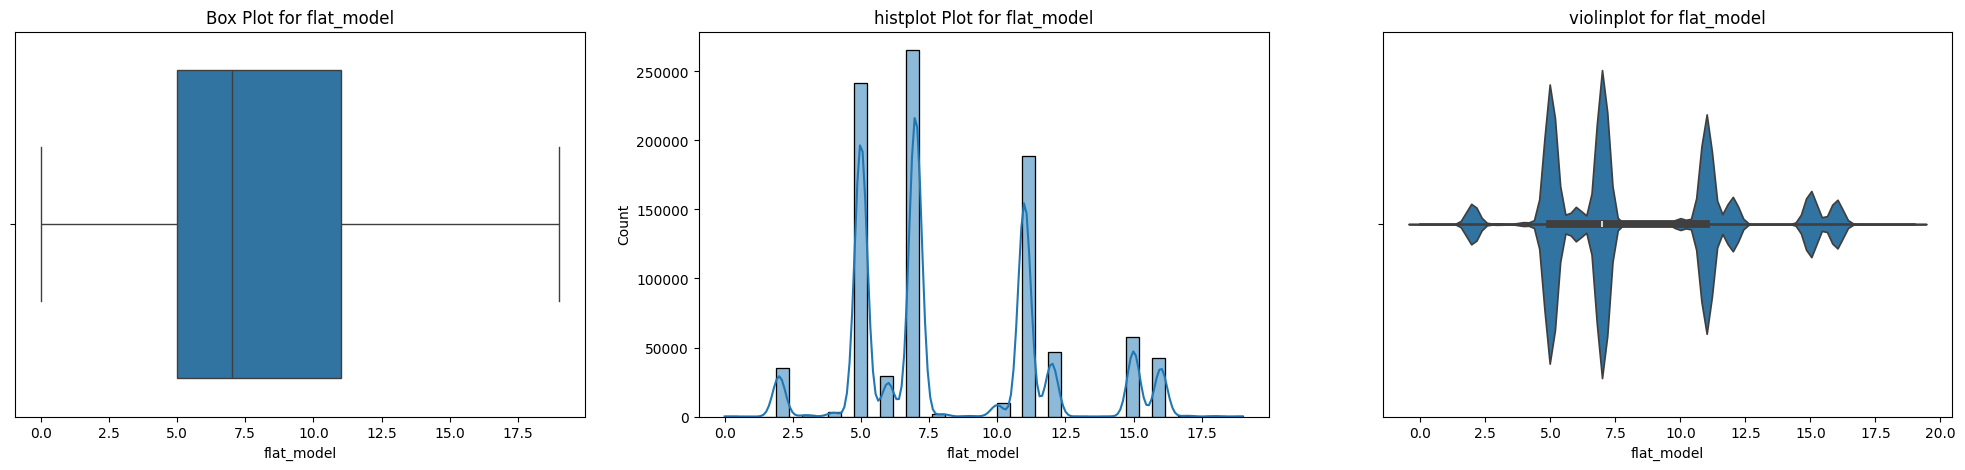

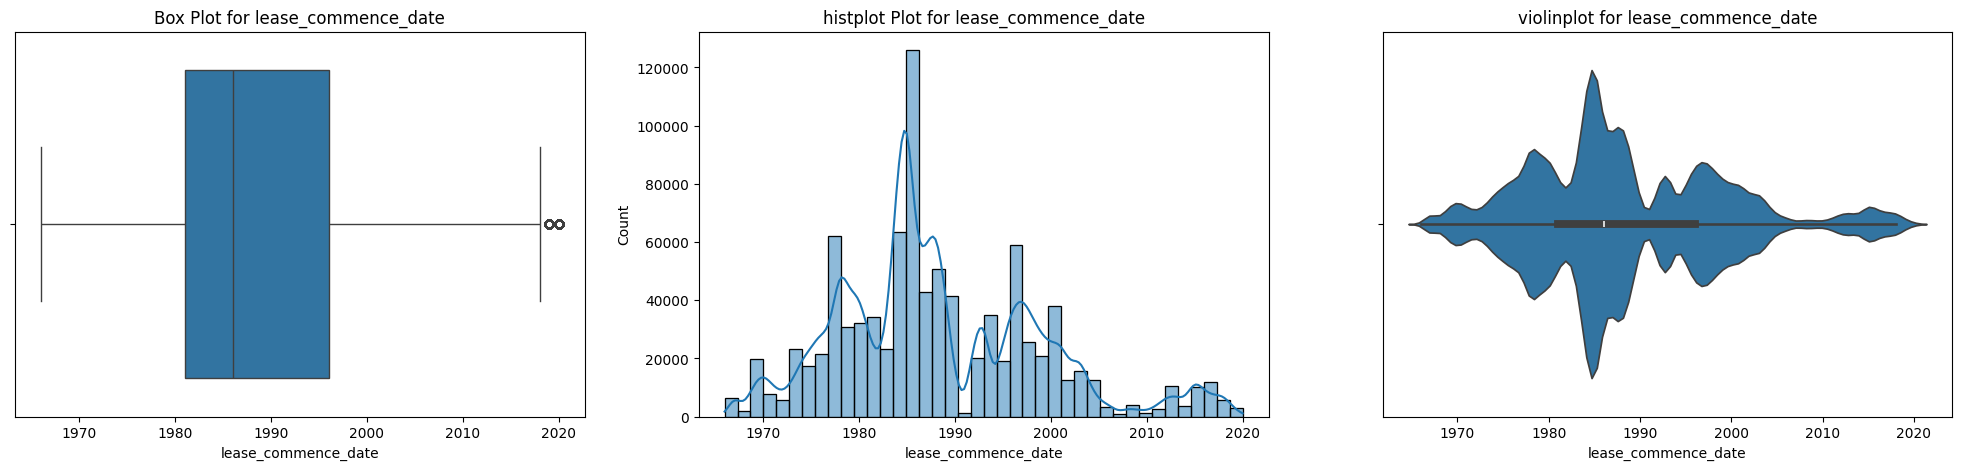

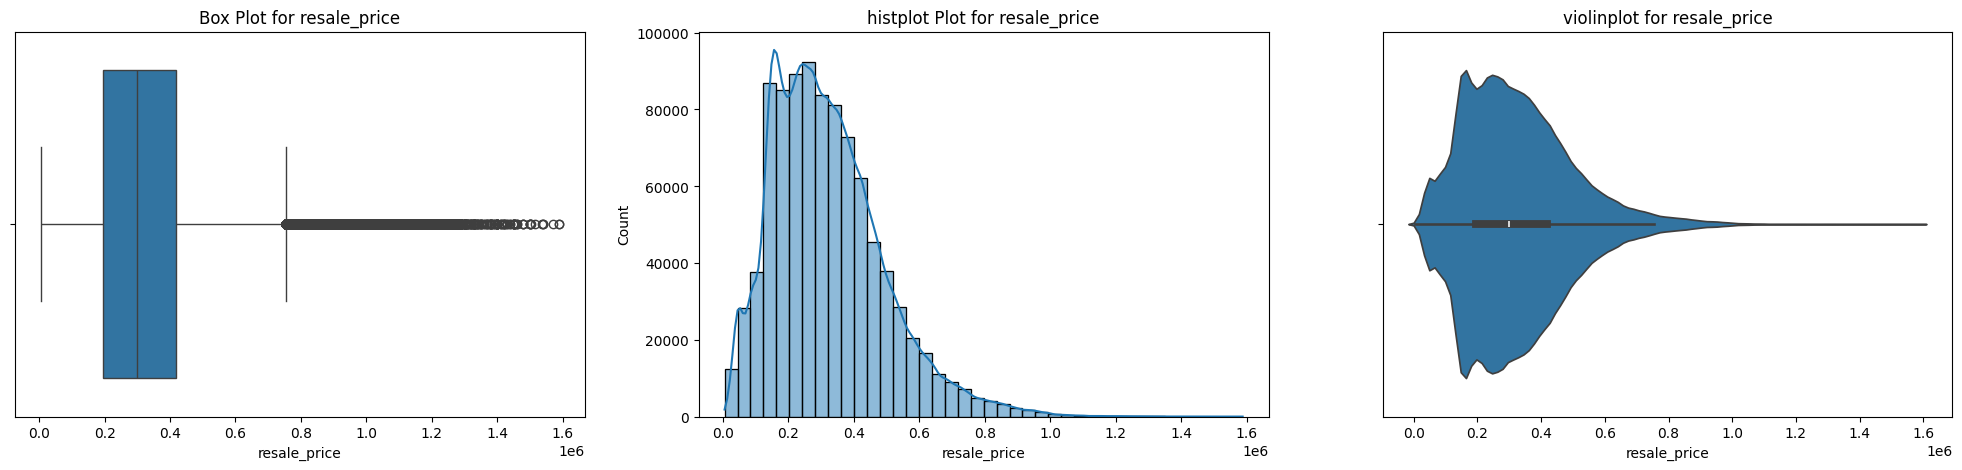

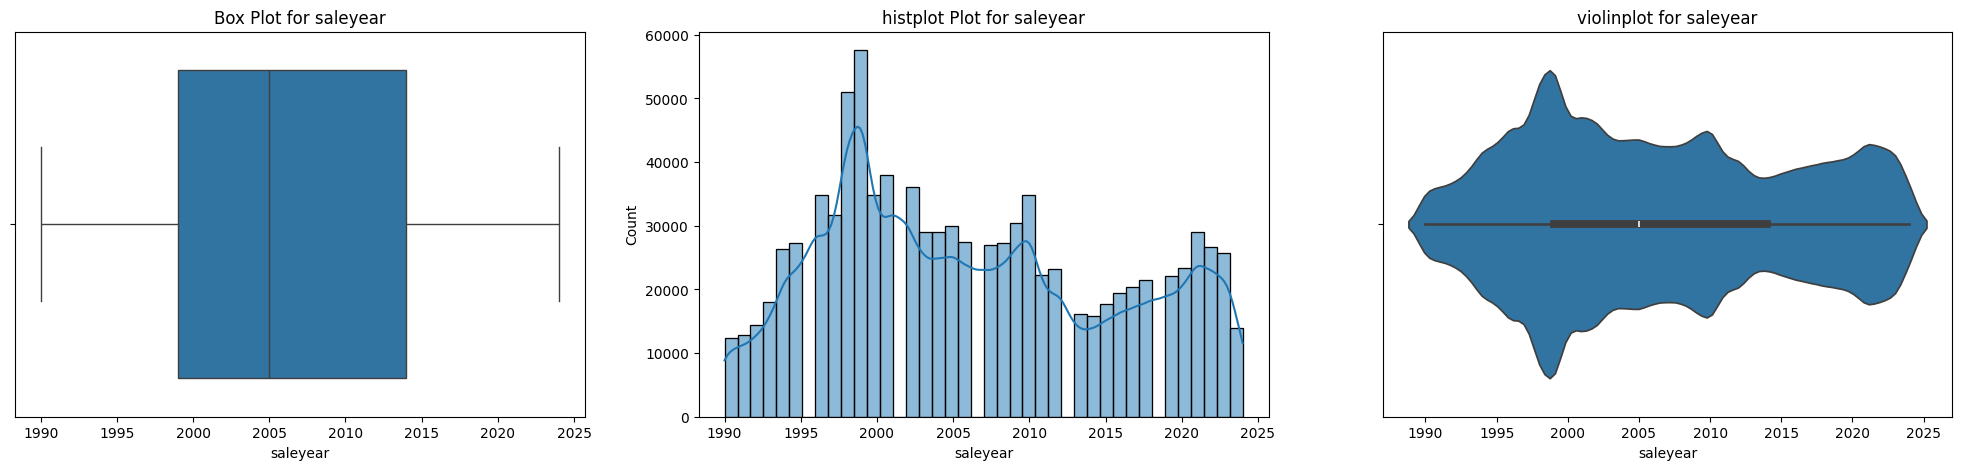

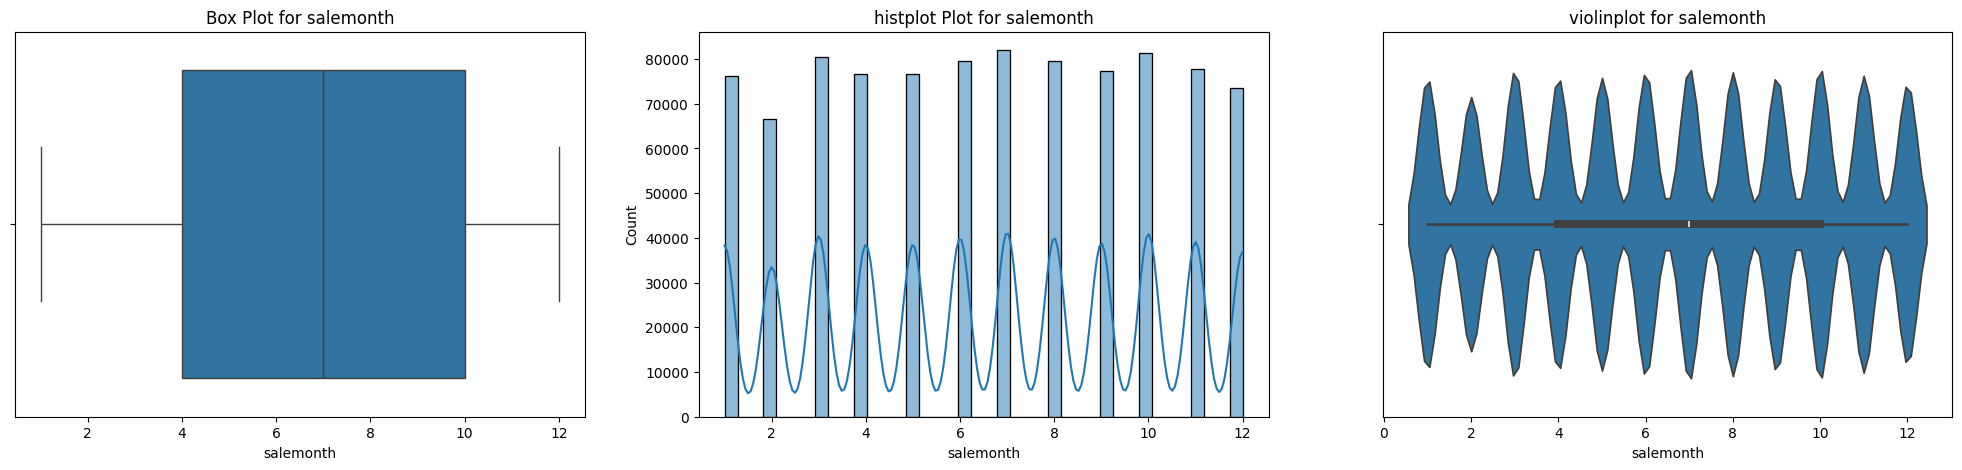

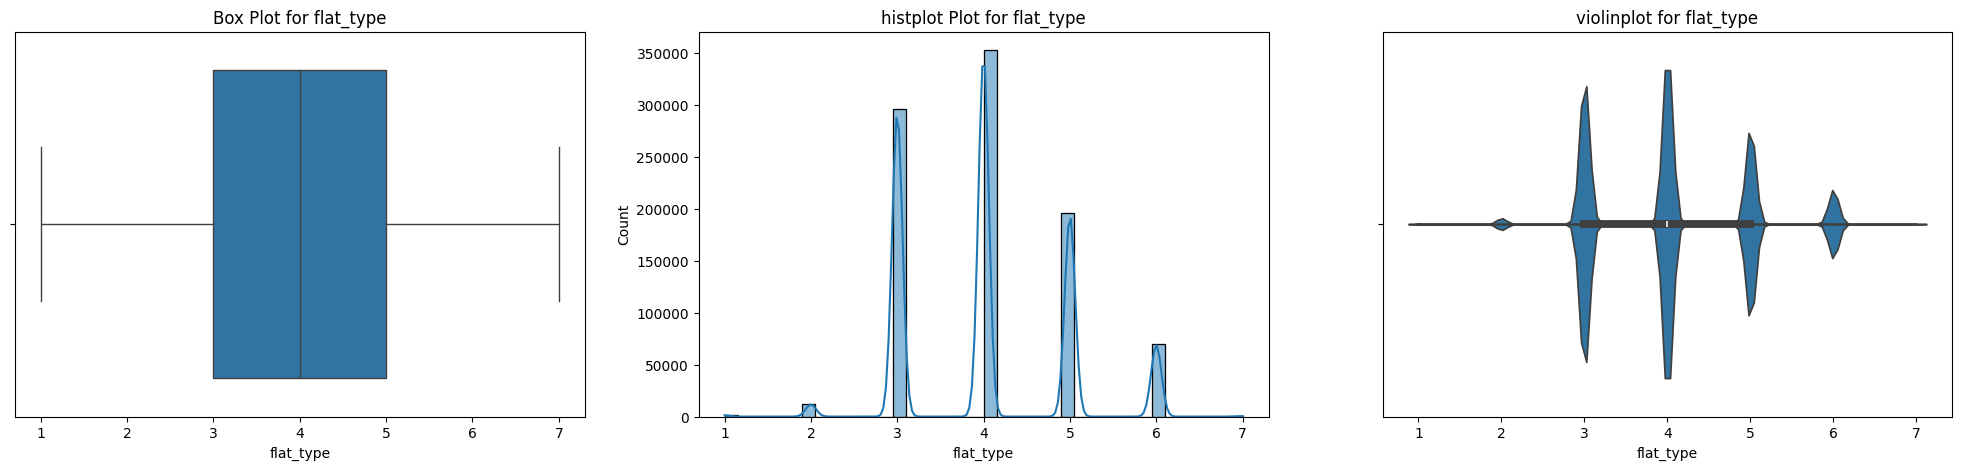

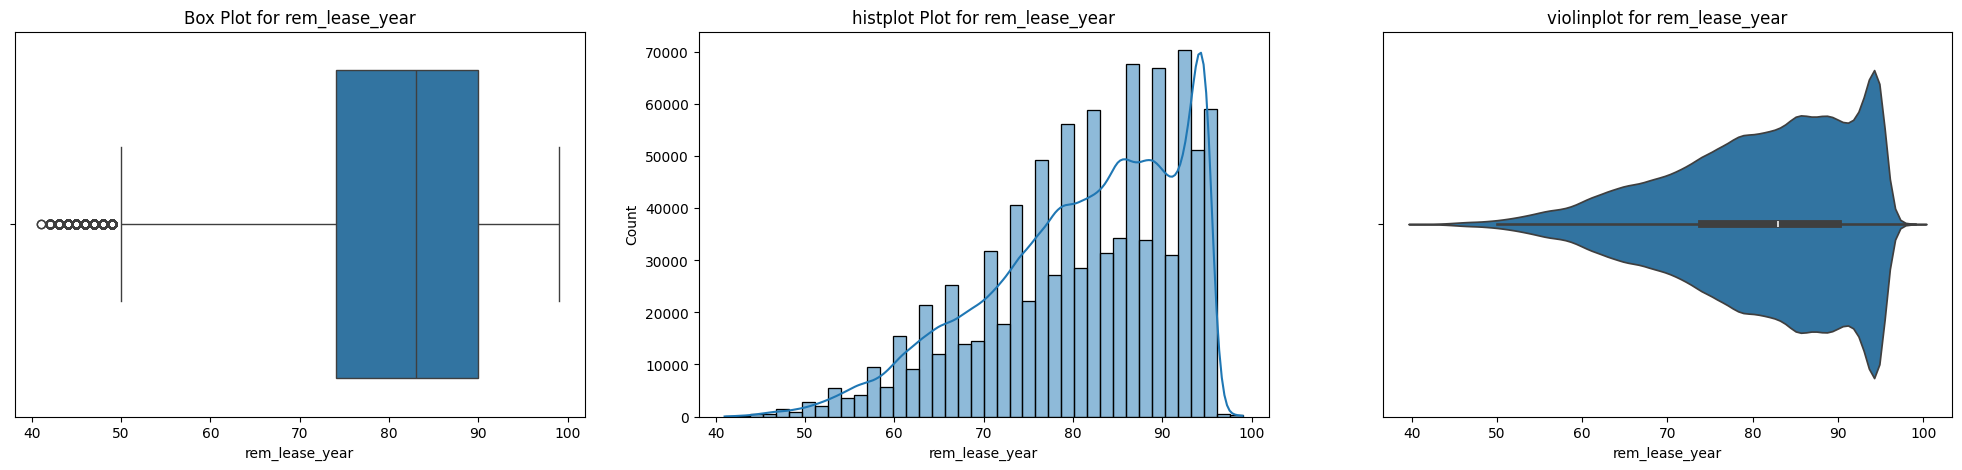

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
def skw(df,col):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=col)
    plt.title(f'Box Plot for {col}')

    plt.subplot(1,3,2)
    sns.histplot(data=df,x=col,kde=True,bins=40)
    plt.title(f'histplot Plot for {col}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=col)
    plt.title(f'violinplot for {col}')
    plt.show()

    
col=['town','storey_range', 'floor_area_sqm', 'flat_model','lease_commence_date', 'resale_price', 'saleyear', 'salemonth','flat_type','rem_lease_year']

for i in col:
    skw(df_new1_clean,i)


In [214]:
df_new1_clean.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'saleyear', 'salemonth',
       'rem_lease_year'],
      dtype='object')

In [215]:
import numpy as np
df_new1_clean['floor_area_sqm']=np.log(df_new1_clean['floor_area_sqm'])
df_new1_clean['resale_price']=np.log(df_new1_clean['resale_price'])
df_new1_clean['rem_lease_year']=np.log(df_new1_clean['rem_lease_year'])
df_new1_clean['saleyear']=np.log(df_new1_clean['saleyear'])
#df_new1_clean['storey_range']=np.log(df_new1_clean['storey_range'])





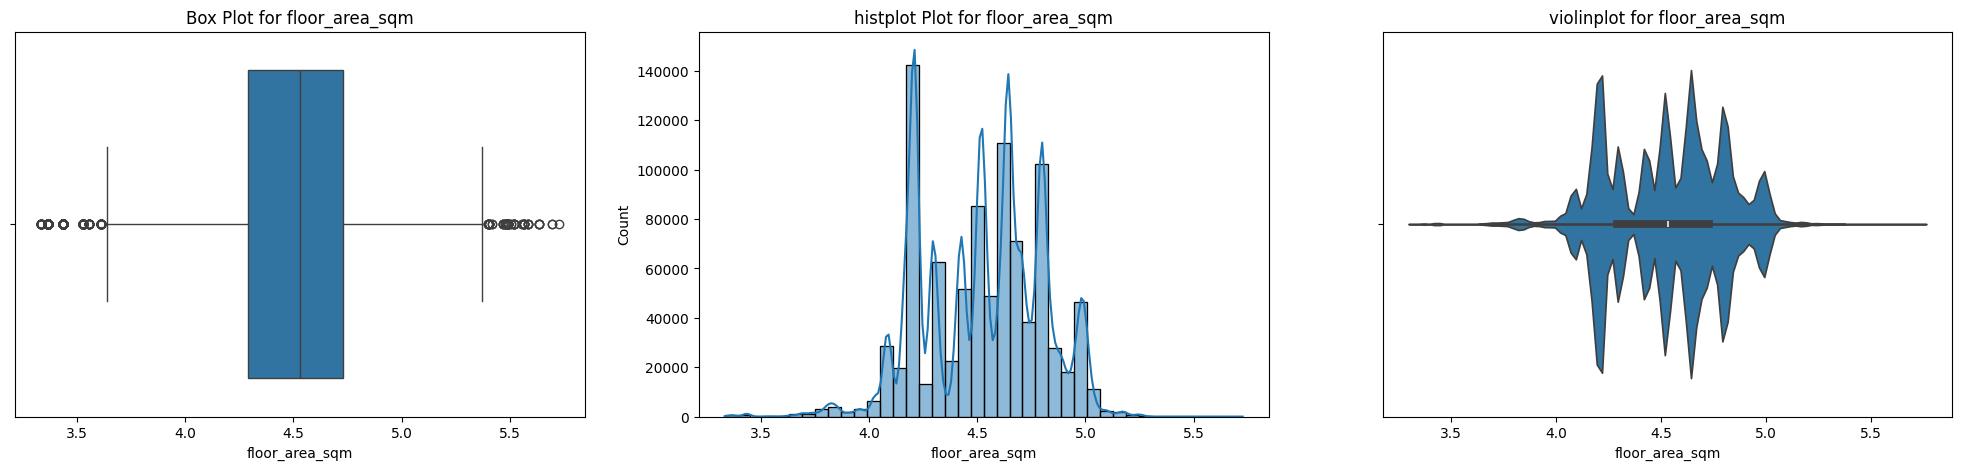

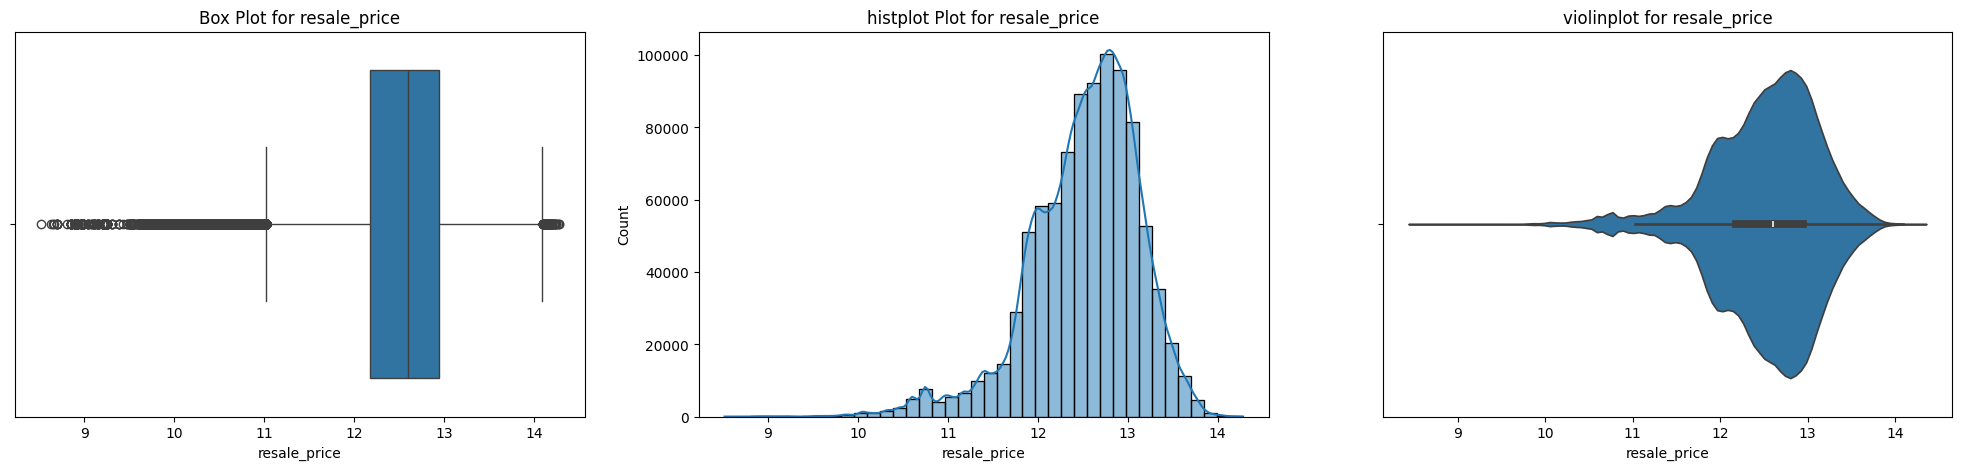

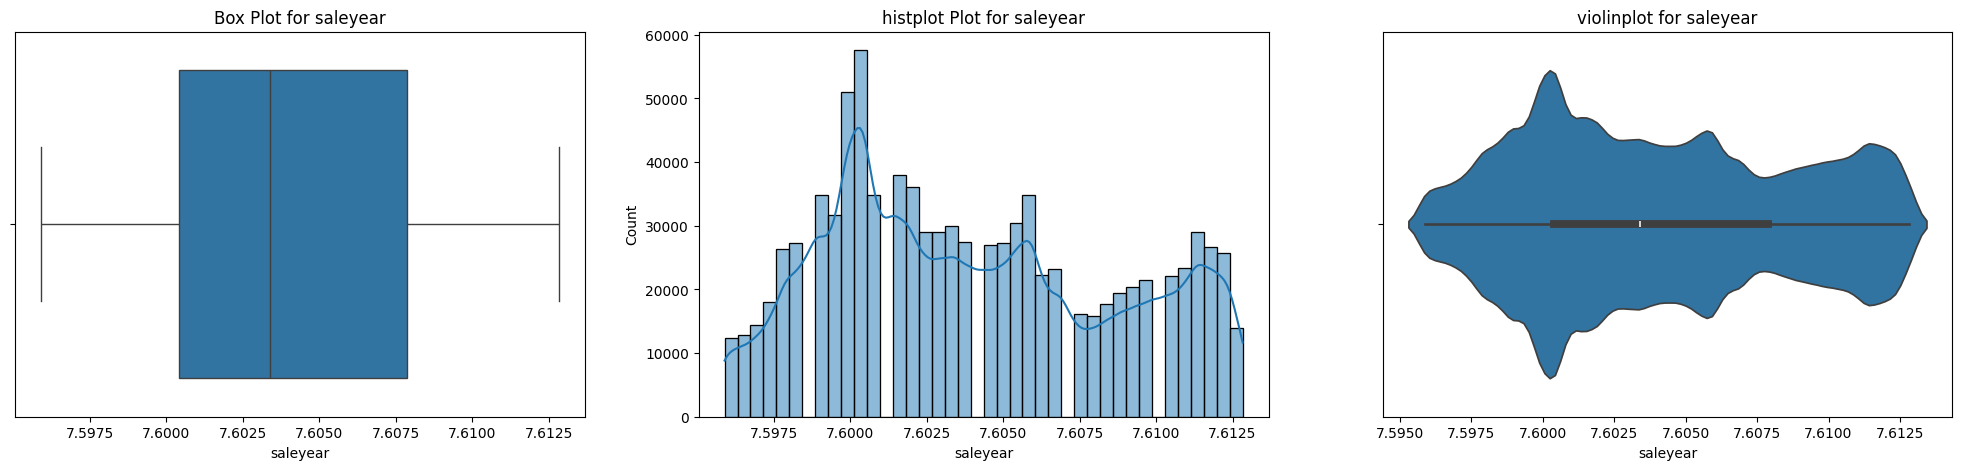

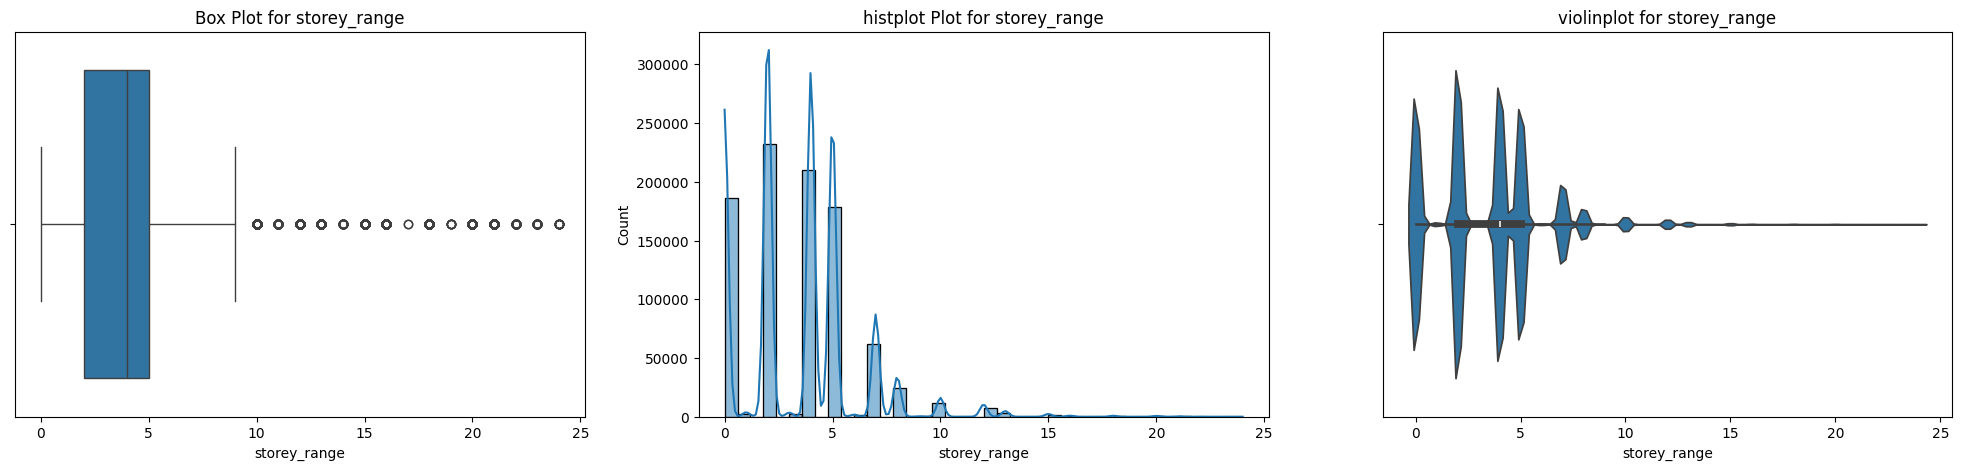

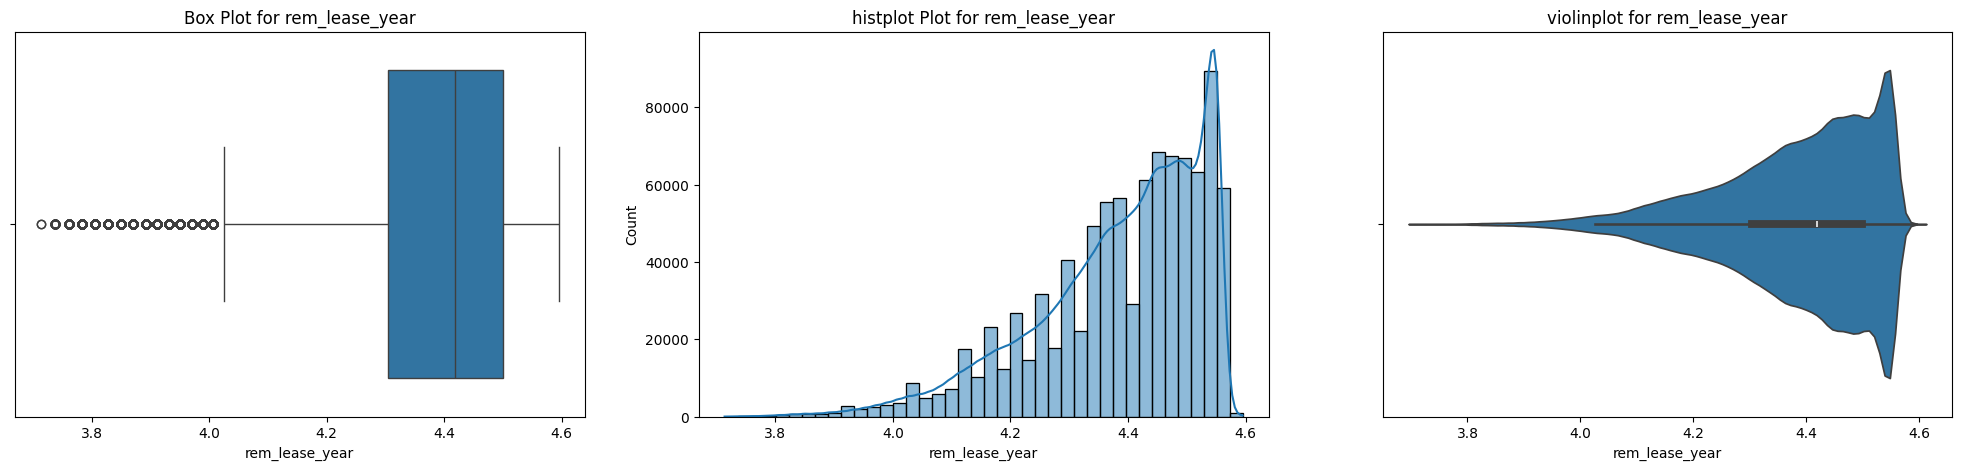

In [216]:
def trans_log(df,col):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=col)
    plt.title(f'Box Plot for {col}')

    plt.subplot(1,3,2)
    sns.histplot(data=df,x=col,kde=True,bins=40)
    plt.title(f'histplot Plot for {col}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=col)
    plt.title(f'violinplot for {col}')
    plt.show()

    
col=[ 'floor_area_sqm','resale_price','saleyear','storey_range','rem_lease_year']

for i in col:
    trans_log(df_new1_clean,i)

In [217]:
def iqrmeth(df,col):
    q3= df[col].quantile(0.75)
    q1= df[col].quantile(0.25)
    iqr=q3-q1
    upperbound=q3+(1.5*iqr)
    lowerbound=q1-(1.5*iqr)
    df[col]=np.where(df[col]>upperbound,upperbound,np.where(df[col]<lowerbound,lowerbound,df[col]))  



col=['storey_range','floor_area_sqm','lease_commence_date', 'resale_price', 'saleyear', 'salemonth','rem_lease_year']
for i in col:
     iqrmeth(df_new1_clean,i)



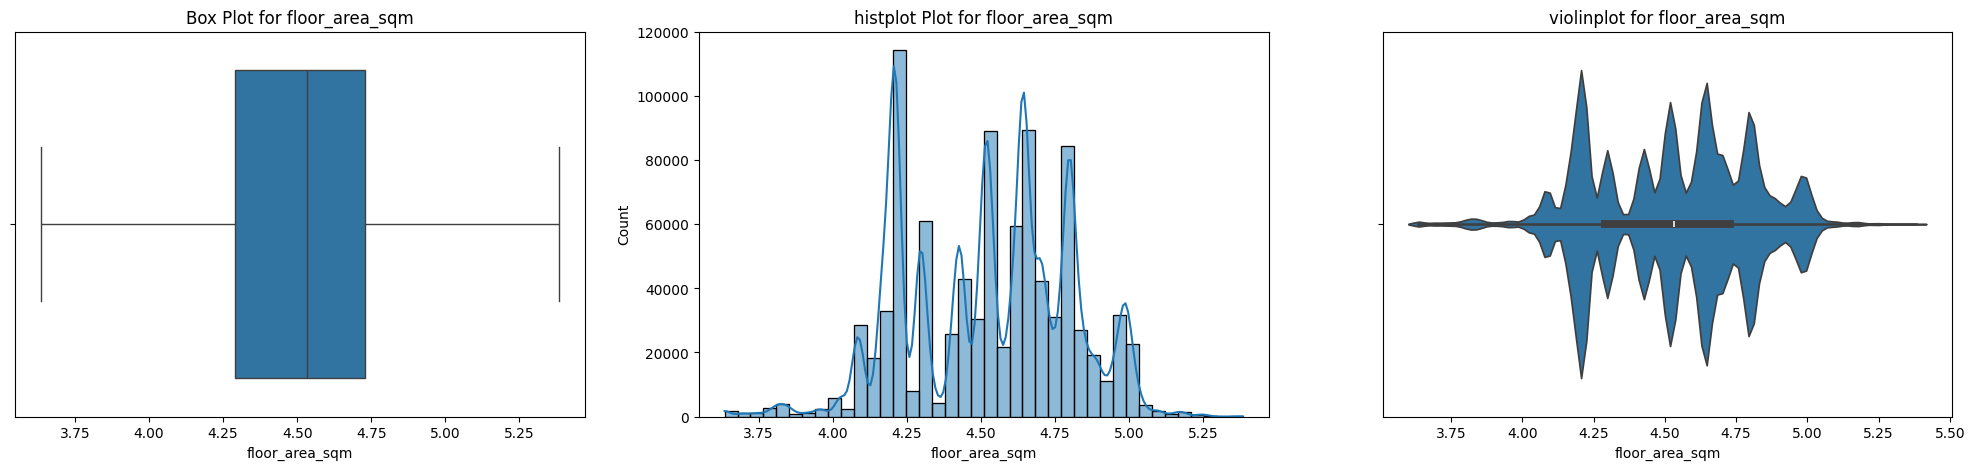

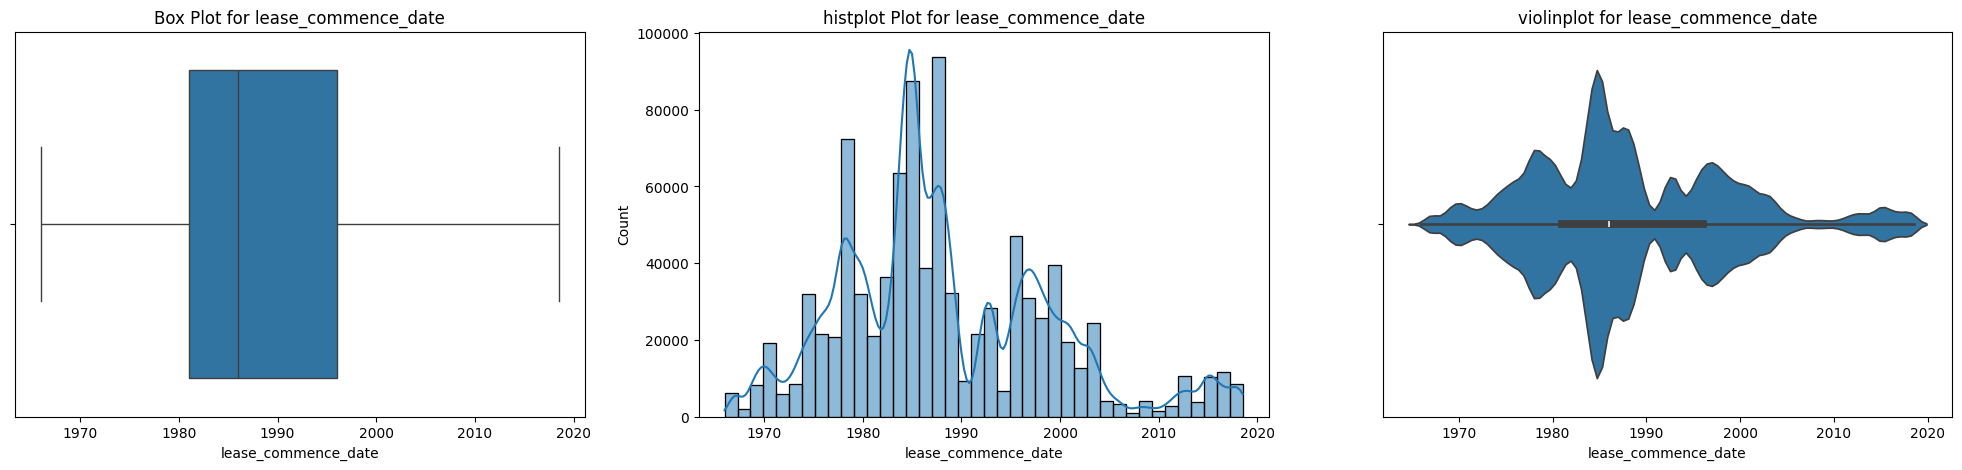

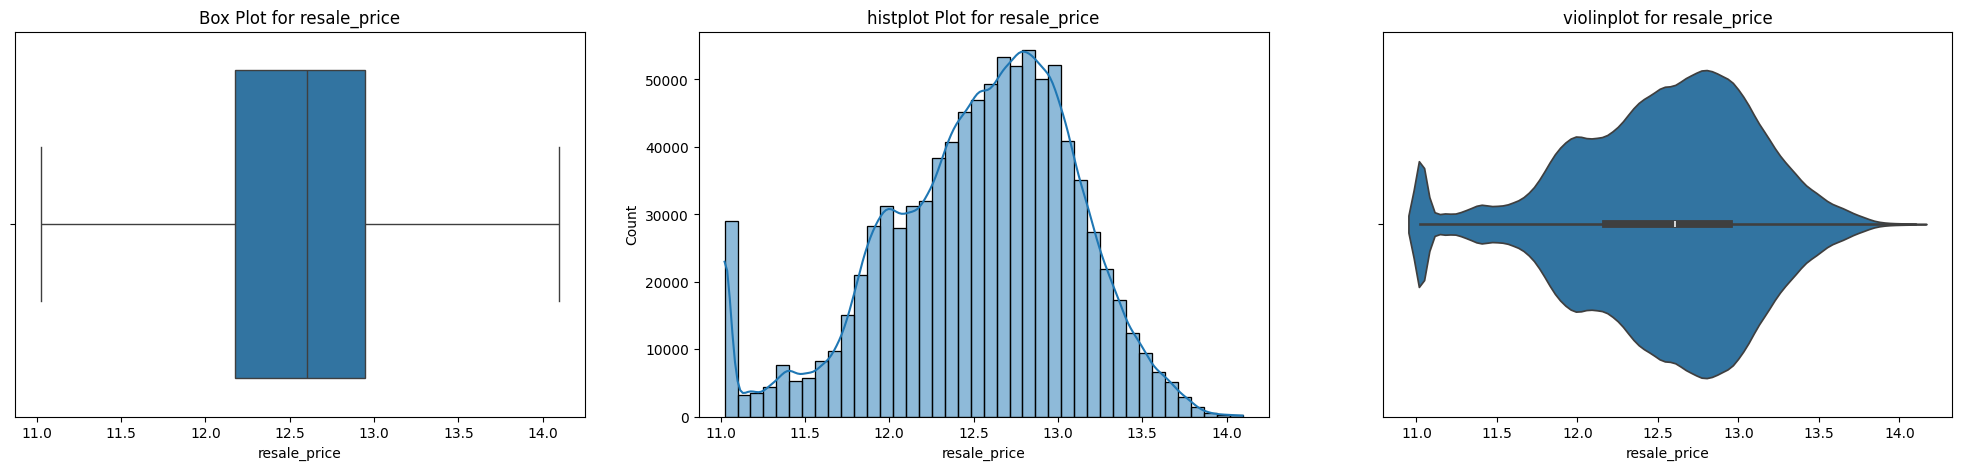

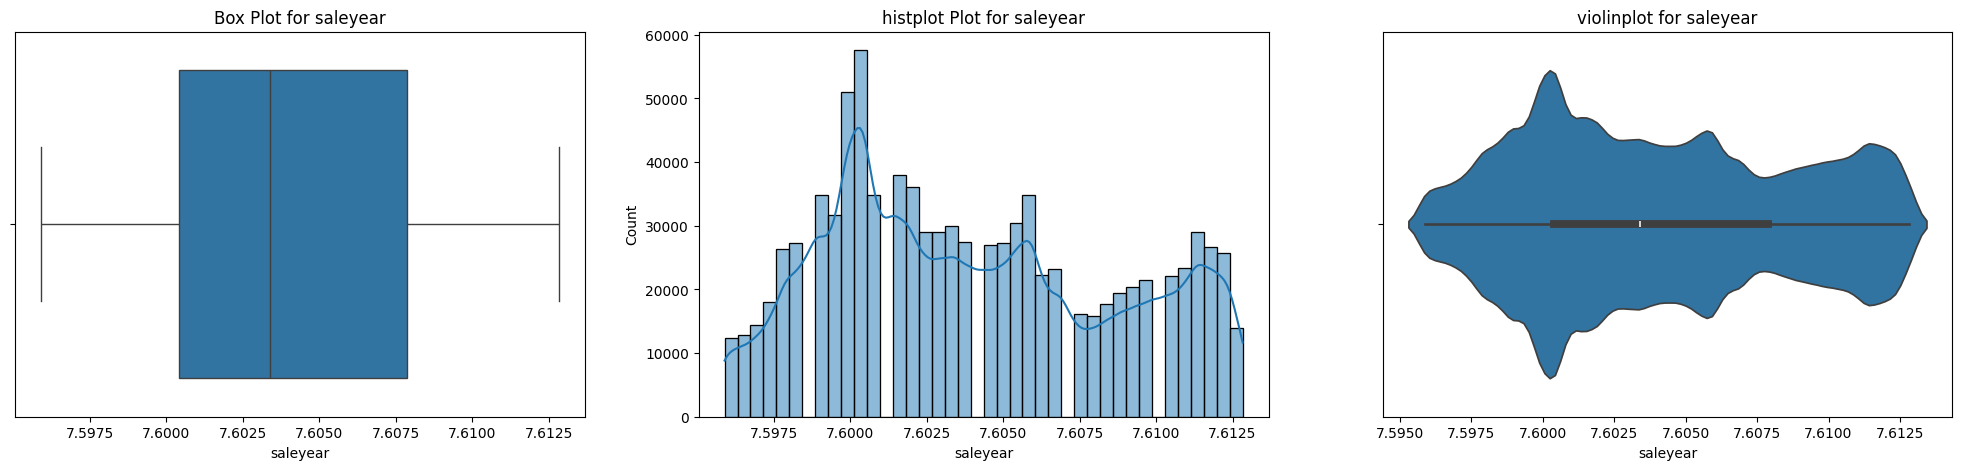

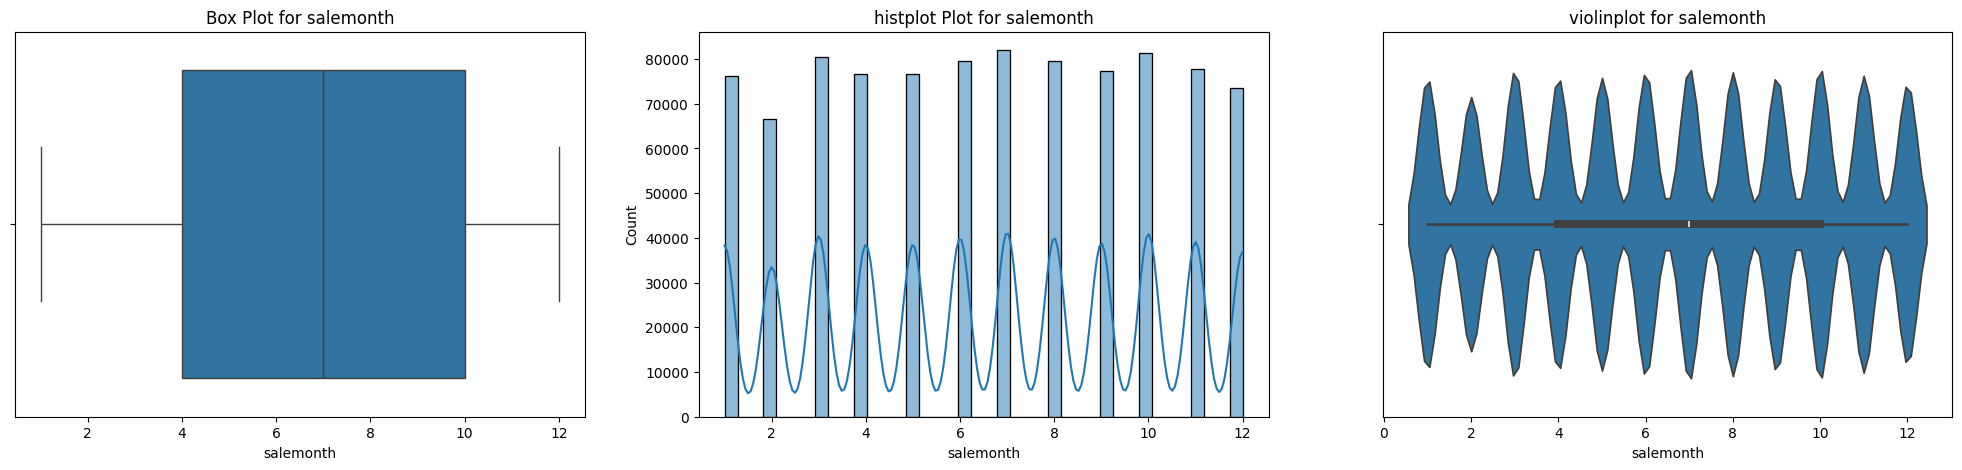

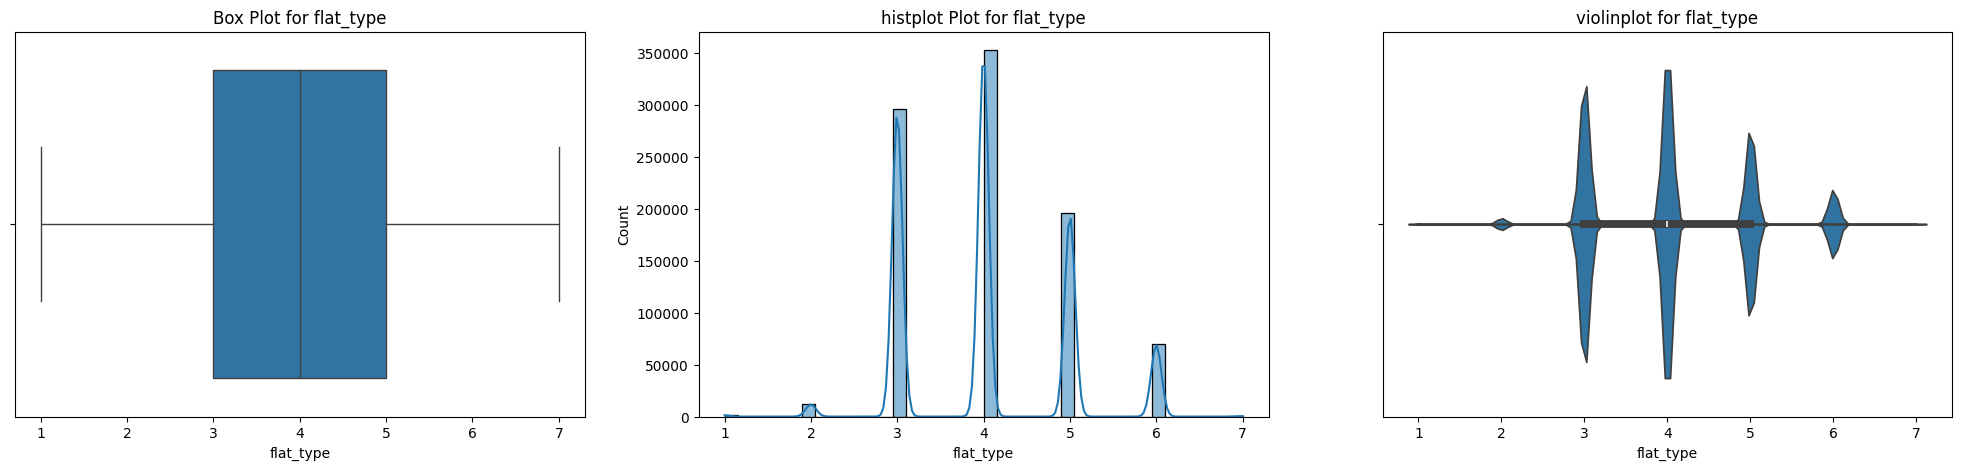

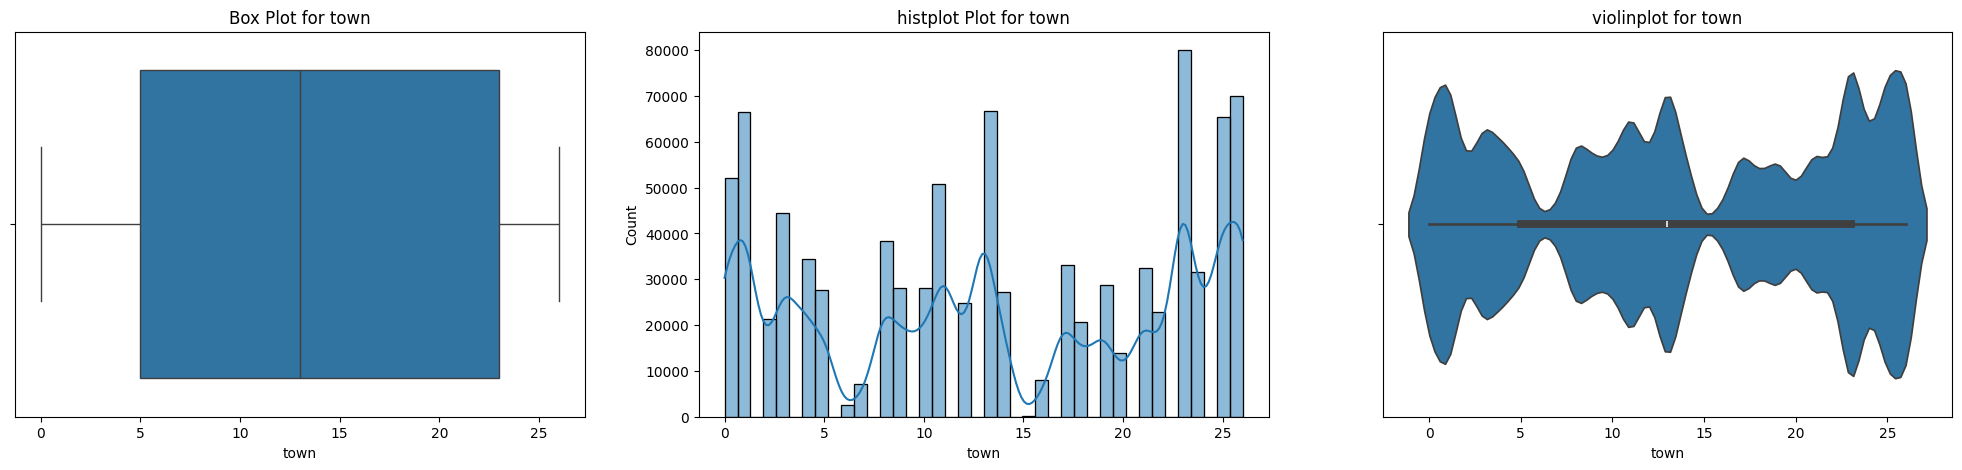

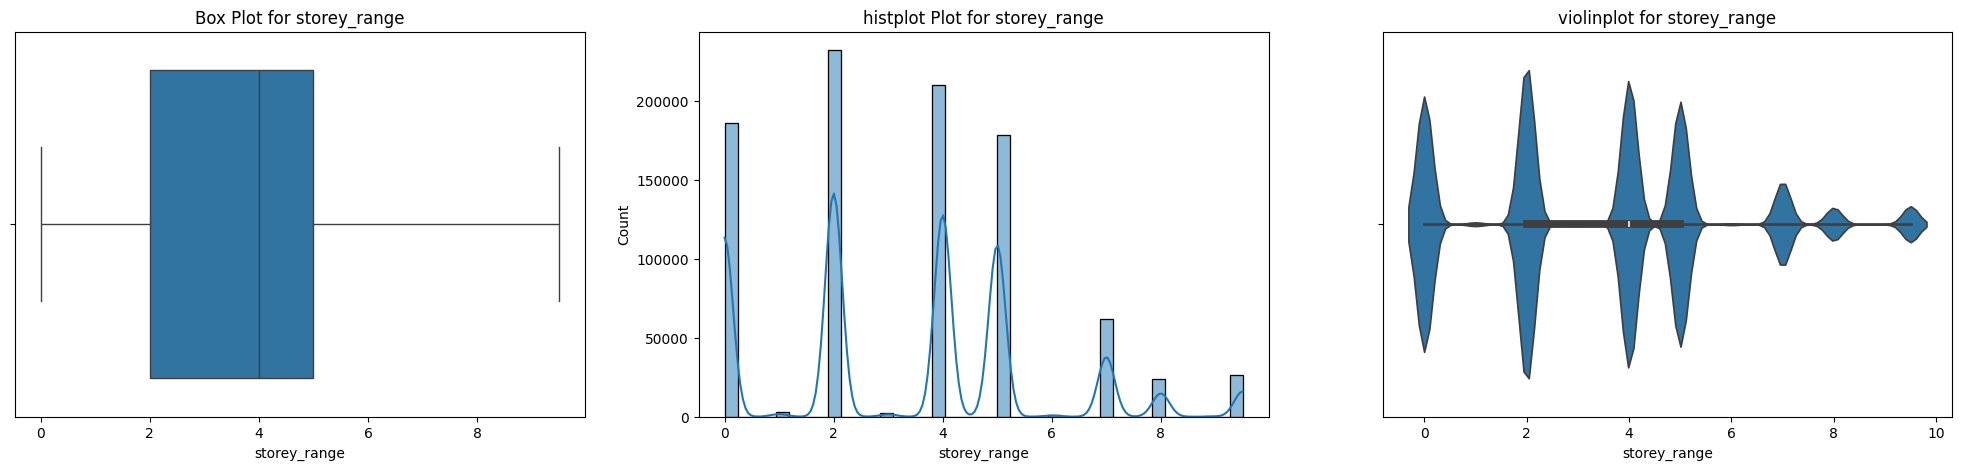

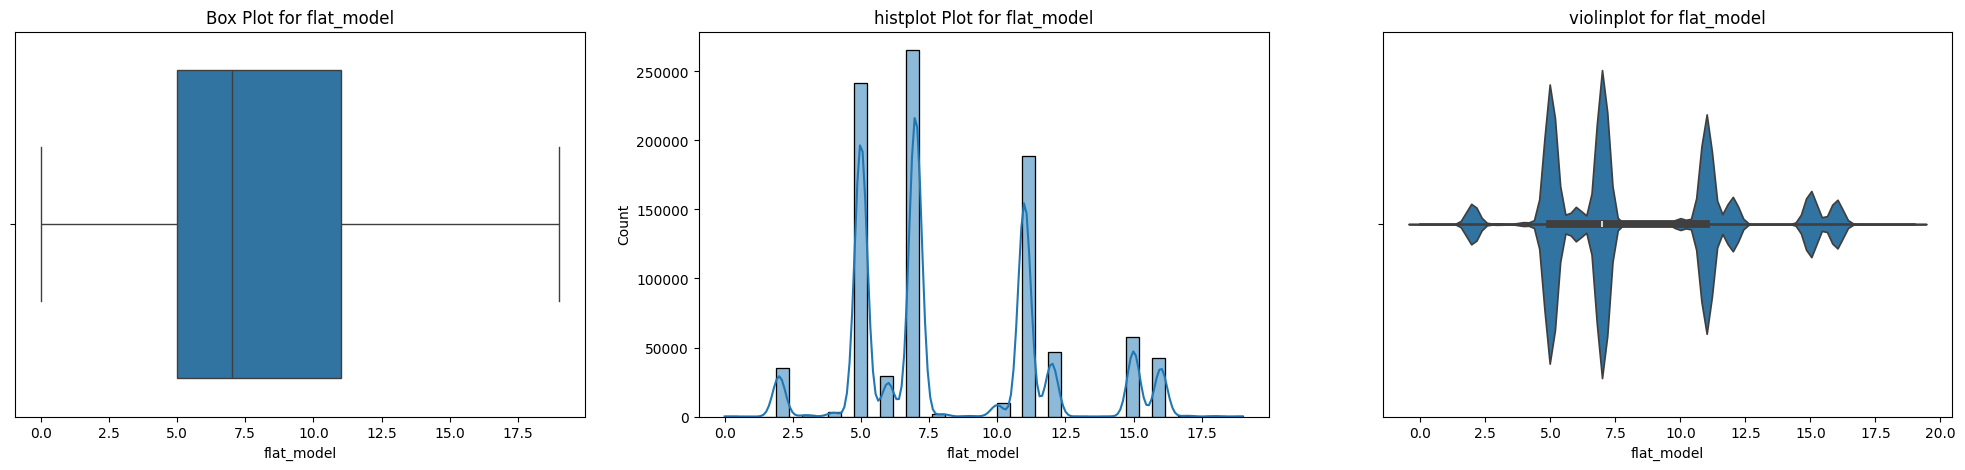

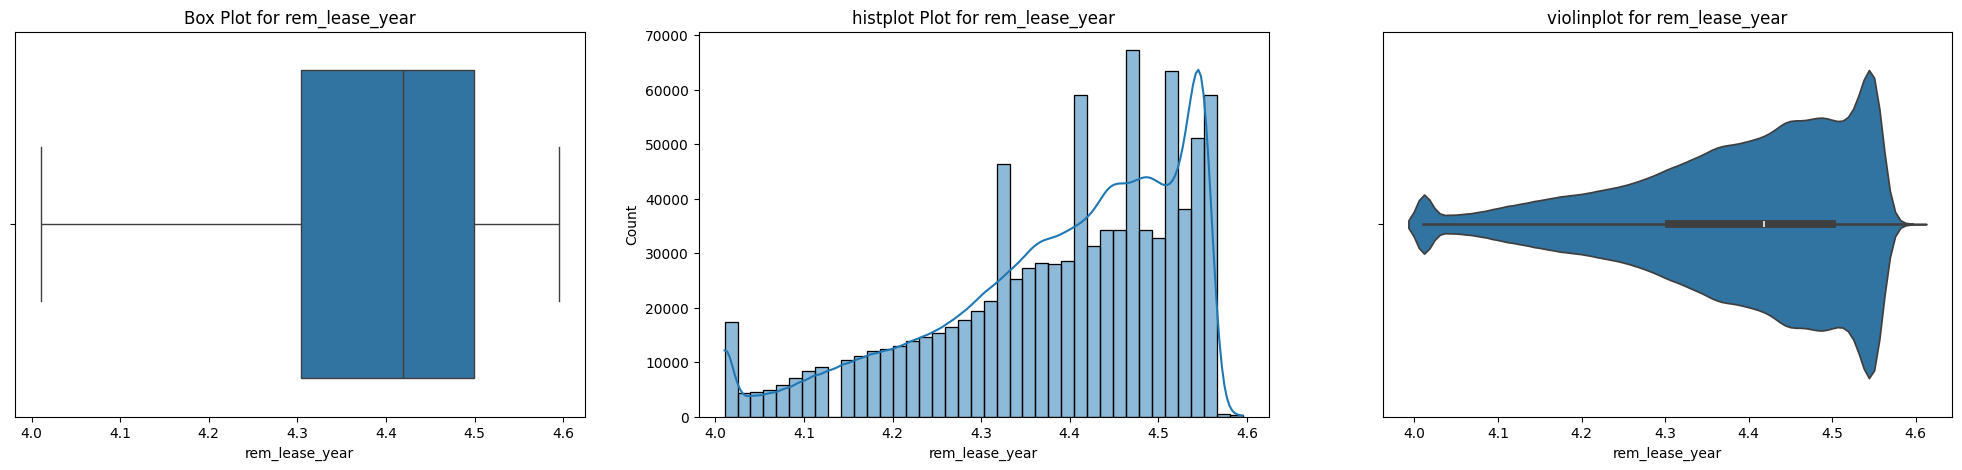

In [218]:
col=['floor_area_sqm','lease_commence_date', 'resale_price', 'saleyear', 'salemonth','flat_type','town','storey_range','flat_model','rem_lease_year']
for i in col:
     skw(df_new1_clean,i)

<Axes: >

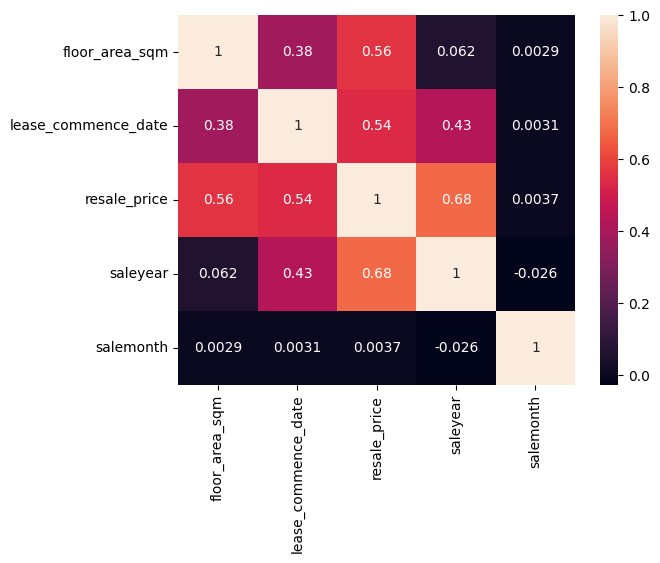

In [219]:
col=['floor_area_sqm','lease_commence_date', 'resale_price', 'saleyear', 'salemonth']
df_bfr=df_new1[col].corr()
sns.heatmap(df_bfr,annot=True)

In [220]:
col=['floor_area_sqm','lease_commence_date', 'resale_price', 'saleyear', 'salemonth','rem_lease_year']
df_heat=df_new1_clean[col].corr()


<Axes: >

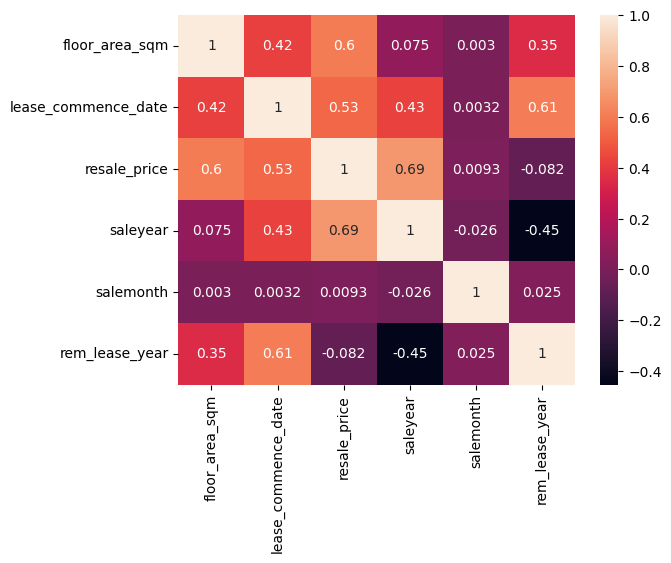

In [221]:
sns.heatmap(df_heat,annot=True)

In [222]:
df_new1_clean['storey_range'].unique()

array([5. , 2. , 4. , 0. , 7. , 9.5, 8. , 3. , 1. , 6. , 9. ])

In [223]:
df_new1_clean.describe()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,saleyear,salemonth,rem_lease_year
count,927301.000000,927301.000000,927301.000000,927301.000000,927301.000000,927301.000000,927301.000000,927301.000000,927301.000000,927301.000000
mean,13.654513,4.014774,3.340984,4.524409,8.266344,1988.299030,12.532499,7.603994,6.549843,4.387155
std,8.794734,0.948252,2.428494,0.275083,3.601840,10.676374,0.577099,0.004657,3.409841,0.138000
min,0.000000,1.000000,0.000000,3.635067,0.000000,1966.000000,11.024179,7.595890,1.000000,4.010448
25%,5.000000,3.000000,2.000000,4.290459,5.000000,1981.000000,12.175613,7.600402,4.000000,4.304065
50%,13.000000,4.000000,4.000000,4.532599,7.000000,1986.000000,12.604849,7.603399,7.000000,4.418841
75%,23.000000,5.000000,5.000000,4.727388,11.000000,1996.000000,12.943237,7.607878,10.000000,4.499810
max,26.000000,7.000000,9.500000,5.382780,19.000000,2018.500000,14.094672,7.612831,12.000000,4.595120


In [224]:
df_new1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927301 entries, 0 to 929323
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 927301 non-null  float64
 1   flat_type            927301 non-null  int64  
 2   storey_range         927301 non-null  float64
 3   floor_area_sqm       927301 non-null  float64
 4   flat_model           927301 non-null  float64
 5   lease_commence_date  927301 non-null  float64
 6   resale_price         927301 non-null  float64
 7   saleyear             927301 non-null  float64
 8   salemonth            927301 non-null  float64
 9   rem_lease_year       927301 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 110.1 MB


In [225]:
df_new1_clean.head(2)

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,saleyear,salemonth,rem_lease_year
0,0.0,1,5.0,3.635067,5.0,1977.0,11.024179,7.59589,1.0,4.454347
1,0.0,1,2.0,3.635067,5.0,1977.0,11.024179,7.59589,1.0,4.454347


In [226]:
df_new1_clean['town'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 16., 19., 21., 22., 23., 24., 25., 26., 15., 20.,  5., 17.,
       18.])

In [227]:
X=df_new1_clean[['town','storey_range','floor_area_sqm','flat_model','flat_type','saleyear','salemonth','lease_commence_date','rem_lease_year']].values
y=df_new1_clean['resale_price'].values

In [228]:
X

array([[0.00000000e+00, 5.00000000e+00, 3.63506687e+00, ...,
        1.00000000e+00, 1.97700000e+03, 4.45434730e+00],
       [0.00000000e+00, 2.00000000e+00, 3.63506687e+00, ...,
        1.00000000e+00, 1.97700000e+03, 4.45434730e+00],
       [0.00000000e+00, 5.00000000e+00, 3.63506687e+00, ...,
        1.00000000e+00, 1.97700000e+03, 4.45434730e+00],
       ...,
       [2.60000000e+01, 2.00000000e+00, 4.72738782e+00, ...,
        7.00000000e+00, 2.01800000e+03, 4.53259949e+00],
       [2.60000000e+01, 0.00000000e+00, 4.71849887e+00, ...,
        7.00000000e+00, 2.01800000e+03, 4.53259949e+00],
       [2.60000000e+01, 0.00000000e+00, 4.98360662e+00, ...,
        7.00000000e+00, 1.98500000e+03, 4.09434456e+00]])

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics




x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)





lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
l1=lin_reg.score(x_train,y_train)
l2=lin_reg.score(x_test,y_test)
print("Linear Regression MODEL ACCURACY",l2*100,'%')


ran_reg = RandomForestRegressor(n_estimators=100)
ran_reg.fit(x_train, y_train)
r1=ran_reg.score(x_train, y_train)
r2=ran_reg.score(x_test,y_test)
print("Random regression model accuracy is",r2*100,'%')

y_pred=lin_reg.predict(x_test)
y_pred1=ran_reg.predict(x_test)


print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.r2_score(y_test,y_pred),'lin_reg r2_square')

print(metrics.mean_squared_error(y_test,y_pred1))
print(metrics.mean_absolute_error(y_test, y_pred1))
print(metrics.r2_score(y_test,y_pred1),'randomforest_reg r2_square')



(741840, 9)
(185461, 9)
(741840,)
(185461,)
Linear Regression MODEL ACCURACY 78.96837371077382 %
Random regression model accuracy is 98.12749341493166 %
0.0700233145345004
0.2080525721514507
0.7896837371077382 lin_reg r2_square
0.006234378443731256
0.05516756396504446
0.9812749341493167 randomforest_reg r2_square


In [230]:
df_new1_clean['town']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
929319    26.0
929320    26.0
929321    26.0
929322    26.0
929323    26.0
Name: town, Length: 927301, dtype: float64

In [233]:
X[67]

array([0.00000000e+00, 0.00000000e+00, 4.21950771e+00, 1.10000000e+01,
       3.00000000e+00, 7.59588992e+00, 1.00000000e+00, 1.98000000e+03,
       4.48863637e+00])

In [236]:
#X=df_new1_clean[['town','storey_range','floor_area_sqm','flat_model','flat_type','saleyear','salemonth','lease_commence_date','rem_lease_year']].values
s=ran_reg.predict([[26.0,13.0,4.219,1.10,3.00,7.595,7.00,1.98,8.488]])
score = ran_reg.score(x_test,y_test)
print(score)
print(score * 100,"%")




0.9812749341493167
98.12749341493166 %


In [237]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
print(gbr.score(x_test,y_test))
g=gbr.score(x_test,y_test)
print("GB MODEL ACCURACY:",g*100,'%')

0.9445394418532068
0.9444129505376987
GB MODEL ACCURACY: 94.44129505376986 %


In [238]:
df_new1_clean= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred1})
df_new1_clean

,Actual,Predicted
0,13.270783,13.183333
1,12.834681,12.843215
2,12.691580,12.784023
3,12.292250,12.260873
4,13.314635,13.300618
...,...,...
185456,12.314927,12.338098
185457,12.948010,12.727390
185458,13.429848,13.381682
185459,12.495004,12.677201


In [239]:
def reg(x,y,model):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model_name = model().fit(x_train, y_train)

    y_pred_train = model_name.predict(x_train)
    y_pred_test = model_name.predict(x_test)

    Accuracy_test=model_name.score(x_test,y_test)
    Accuracy1=Accuracy_test*100,'%'

    Accuracy_train=model_name.score(x_train,y_train)
    Accuracy1=Accuracy_train*100,'%'




    #accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    #accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    MAE= metrics.mean_absolute_error(y_test, y_pred_test)
    MSE= metrics.mean_squared_error(y_test, y_pred_test)
    RSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))


    evolution_metrics = {'MODEL':model,'MEAN_ABSOLUTE_ERROR':MAE,'MEAN_SQUARE_ERROR':MSE,'ROOT_SQUARE_ERROR':RSE,'ACCURACY':Accuracy1}

    return evolution_metrics

In [240]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [241]:
print(reg(X,y,DecisionTreeRegressor))
print(reg(X,y,ExtraTreesRegressor))
print(reg(X,y,RandomForestRegressor))
print(reg(X,y,AdaBoostRegressor))
print(reg(X,y,GradientBoostingRegressor))
print(reg(X,y,KNeighborsRegressor))

{'MODEL': <class 'sklearn.tree._classes.DecisionTreeRegressor'>, 'MEAN_ABSOLUTE_ERROR': 0.06890150346699297, 'MEAN_SQUARE_ERROR': 0.010058328573748481, 'ROOT_SQUARE_ERROR': 0.10029121882671724, 'ACCURACY': (99.78327952089737, '%')}
{'MODEL': <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>, 'MEAN_ABSOLUTE_ERROR': 0.05984596604531716, 'MEAN_SQUARE_ERROR': 0.007321654340707591, 'ROOT_SQUARE_ERROR': 0.08556666606049106, 'ACCURACY': (99.78327952089737, '%')}
{'MODEL': <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 'MEAN_ABSOLUTE_ERROR': 0.05523103983816146, 'MEAN_SQUARE_ERROR': 0.006211495832529426, 'ROOT_SQUARE_ERROR': 0.07881304354311808, 'ACCURACY': (99.58860309031743, '%')}
{'MODEL': <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>, 'MEAN_ABSOLUTE_ERROR': 0.1813596153357633, 'MEAN_SQUARE_ERROR': 0.051445079625975214, 'ROOT_SQUARE_ERROR': 0.22681507803930323, 'ACCURACY': (84.51657538748385, '%')}
{'MODEL': <class 'sklearn.ensemble._gb.GradientBoostingRegres

In [242]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.24179820613409098
RMSE value for k=  2 is: 0.23271328163242636
RMSE value for k=  3 is: 0.23740553597172181
RMSE value for k=  4 is: 0.24456565339181022
RMSE value for k=  5 is: 0.25132691096866105
RMSE value for k=  6 is: 0.25777140546353283
RMSE value for k=  7 is: 0.26344038808369674
RMSE value for k=  8 is: 0.2686146180216861
RMSE value for k=  9 is: 0.27303029715249544
RMSE value for k=  10 is: 0.2769958495243689
RMSE value for k=  11 is: 0.2805258408057502
RMSE value for k=  12 is: 0.2836163801939749
RMSE value for k=  13 is: 0.2863909596252007
RMSE value for k=  14 is: 0.2890148465331233
RMSE value for k=  15 is: 0.29126794717269283
RMSE value for k=  16 is: 0.2934133845711003
RMSE value for k=  17 is: 0.29544499606420693
RMSE value for k=  18 is: 0.2973004281395792
RMSE value for k=  19 is: 0.2990802552933778
RMSE value for k=  20 is: 0.3007075951913096


<Axes: >

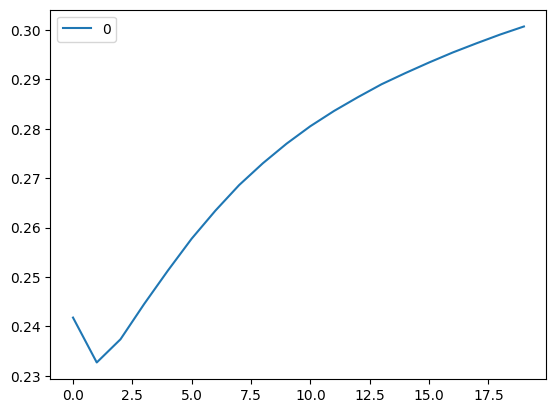

In [251]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [243]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [245]:
from sklearn.tree import DecisionTreeRegressor
for i in range(25):
    i=i+1
    dt=DecisionTreeRegressor(max_depth=i,random_state=32)
    dt.fit(x_train,y_train)
    s=dt.predict([[26.0,13.0,4.219,1.10,3.00,7.595,7.00,1.98,8.488]])
    score =dt.score(x_test,y_test)
    print('ACCURACY score value for max_depth = ' , i , 'is:',score * 100,"%" )

ACCURACY score value for max_depth =  1 is: 38.628835113806005 %
ACCURACY score value for max_depth =  2 is: 64.48759305033427 %
ACCURACY score value for max_depth =  3 is: 78.25596158952591 %
ACCURACY score value for max_depth =  4 is: 85.13524426578701 %
ACCURACY score value for max_depth =  5 is: 88.19312263934324 %
ACCURACY score value for max_depth =  6 is: 90.08142997734682 %
ACCURACY score value for max_depth =  7 is: 91.42565325892397 %
ACCURACY score value for max_depth =  8 is: 92.47110307858473 %
ACCURACY score value for max_depth =  9 is: 93.43151976776653 %
ACCURACY score value for max_depth =  10 is: 94.11648738091091 %
ACCURACY score value for max_depth =  11 is: 94.73709724784611 %
ACCURACY score value for max_depth =  12 is: 95.36963073229526 %
ACCURACY score value for max_depth =  13 is: 95.87909511210553 %
ACCURACY score value for max_depth =  14 is: 96.2909245422842 %
ACCURACY score value for max_depth =  15 is: 96.62710067375518 %
ACCURACY score value for max_depth

In [247]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=34)
dt.fit(x_train,y_train)
s=dt.predict([[23.0,19.0,9.219,5.25,3.00,17.595,1.00,11.98,30.488]])
score =dt.score(x_test,y_test)
print(score)
print(score * 100,"%")

0.9697139177263421
96.9713917726342 %


In [248]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=100)
dt.fit(x_train,y_train)
s=dt.predict([[23.0,19.0,9.219,5.25,3.00,17.595,1.00,11.98,30.488]])
score =dt.score(x_test,y_test)
print(score)
print(score * 100,"%")

0.969827862379287
96.98278623792869 %


In [249]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=8)
dt.fit(x_train,y_train)
s=dt.predict([[23.0,19.0,9.219,5.25,3.00,17.595,1.00,11.98,30.488]])
score =dt.score(x_test,y_test)
print(score)
print(score * 100,"%")

0.9697160744280062
96.97160744280062 %


In [250]:
#saving the model

import pickle
with open("DecisionTreeRegressor_pkl","wb") as files:
  pickle.dump(dt, files)

with open("DecisionTreeRegressor_pkl","rb") as files:
  model=pickle.load(files)

In [ ]:
df_new1['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [ ]:
df_new1['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [ ]:
df_new1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,saleyear,salemonth,rem_lease_year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,86
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,86


<Axes: xlabel='rem_lease_year', ylabel='resale_price'>

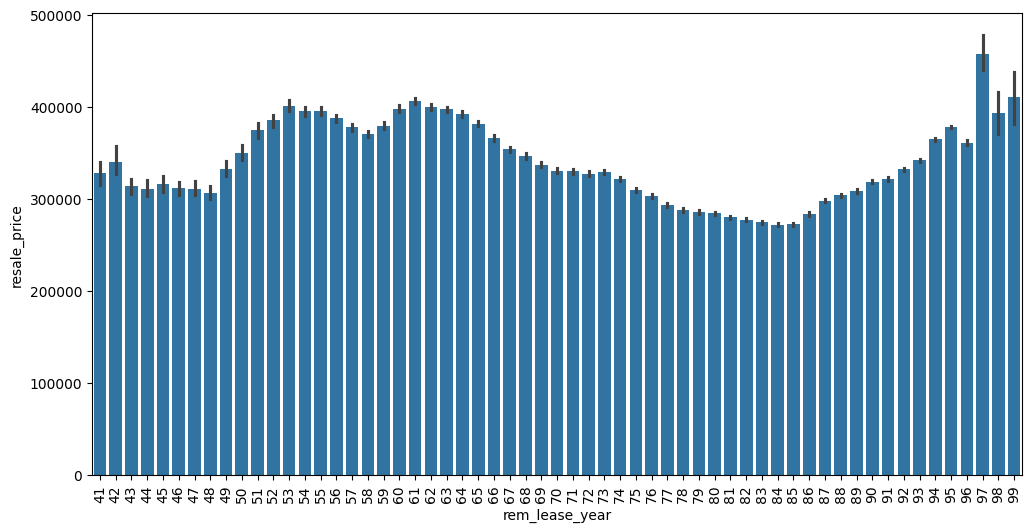

In [ ]:
import matplotlib.pyplot as plt

# sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(figsize=(12, 6))
ax.tick_params(axis='x', labelrotation=90)
sns.barplot(df_new1,x='rem_lease_year',y='resale_price', ax=ax)

<Axes: xlabel='rem_lease_year', ylabel='resale_price'>

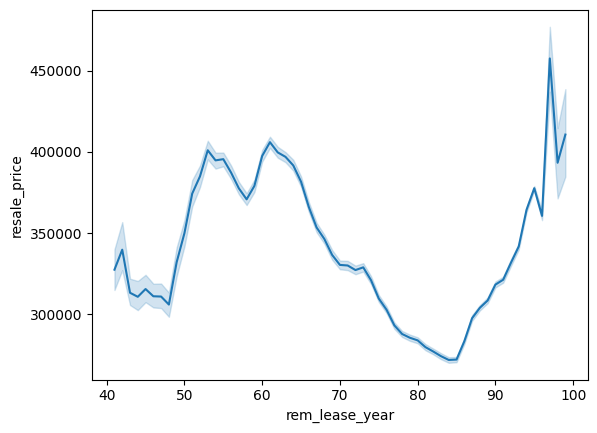

In [ ]:
sns.lineplot(df_new1,x='rem_lease_year',y="resale_price")

<Axes: xlabel='town', ylabel='resale_price'>

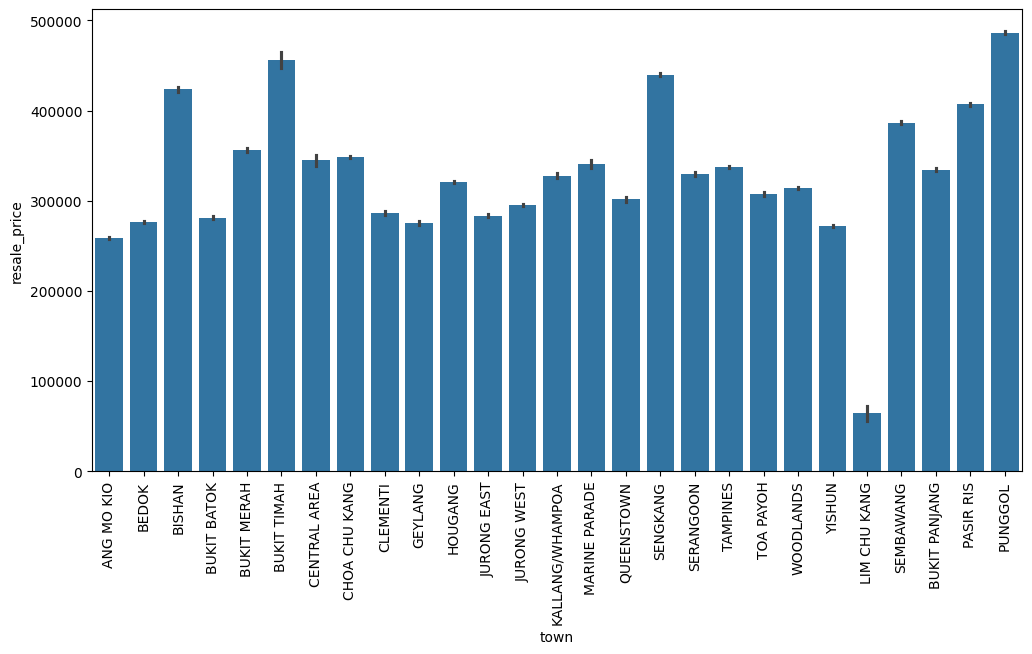

In [ ]:
import matplotlib.pyplot as plt

# sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(figsize=(12, 6))
ax.tick_params(axis='x', labelrotation=90)
sns.barplot(df_new1,x='town',y='resale_price', ax=ax)

<Axes: xlabel='town', ylabel='flat_type'>

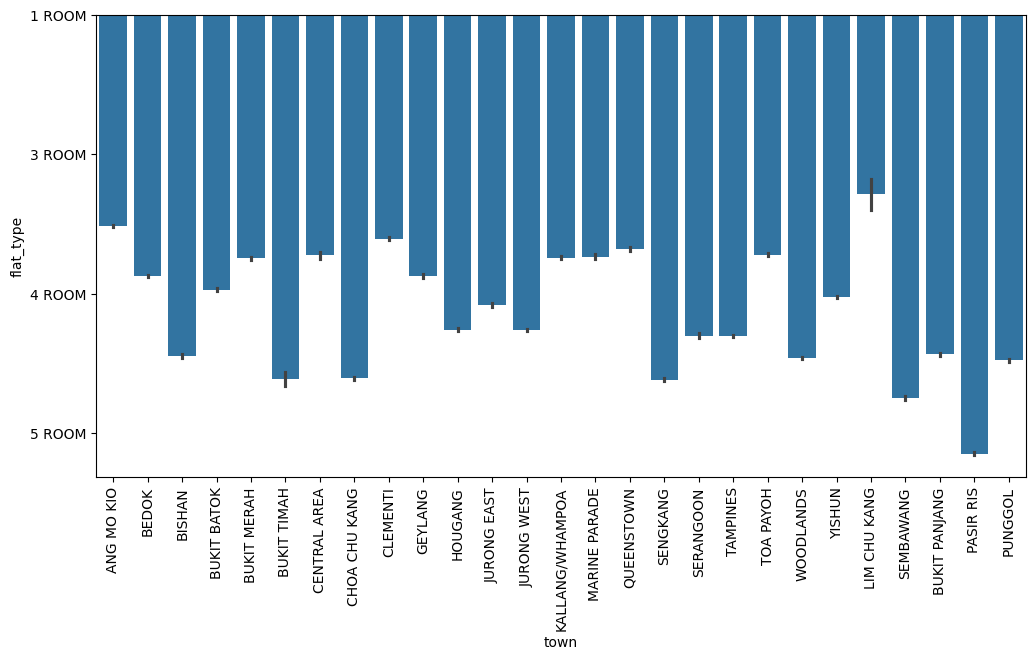

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.tick_params(axis='x', labelrotation=90)
sns.barplot(x='town',y='flat_type',data=df_new1)

